In [1]:
import sys
from dotenv import load_dotenv
import os
import sys
from pathlib import Path

AVES_ROOT = Path("../aves")
CENSUS_GEO_ROOT = AVES_ROOT / "data" / "external" / "censo_2017" / "geometria"
EOD_PATH = AVES_ROOT / "data" / "external" / "EOD_STGO"
EOD_PATH

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 96

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

from aves.config import setup_style

from aves.data import eod
from aves.data.census.loading import read_census_map
from aves.features.utils import normalize_rows

setup_style()

In [3]:
import sys

sys.argv.append(["--max-memory", "4G"])

import datetime
from pathlib import Path

import geopandas as gpd
import pandas as pd
import pyrosm
import seaborn as sns
from r5py import TransportMode, TransportNetwork, TravelTimeMatrixComputer

from aves.data import eod
from aves.visualization.figures import small_multiples_from_geodataframe

In [5]:
network = TransportNetwork("/home/javiergonb/aves/data/external/OSM/clipped-scl-osm.pbf", '/home/javiergonb/aves/data/external/gtfs/GTFS-V124-PO20240601b.zip')

In [4]:

OSM_PATH = AVES_ROOT / "data" / "external" / "OSM"
osm_clipped_file = OSM_PATH / "clipped-scl-osm.pbf"

zones = gpd.read_file(AVES_ROOT / "data" / "processed" / "scl_zonas_urbanas.json")

In [5]:
zones['geometry_original'] = zones['geometry']
zones['geometry'] = zones.centroid

/tmp/ipykernel_1164/3054921321.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zones['geometry'] = zones.centroid


In [6]:
zones_orig = zones.drop('geometry', axis=1).rename({'geometry_original': 'geometry'}, axis=1)

<Axes: >

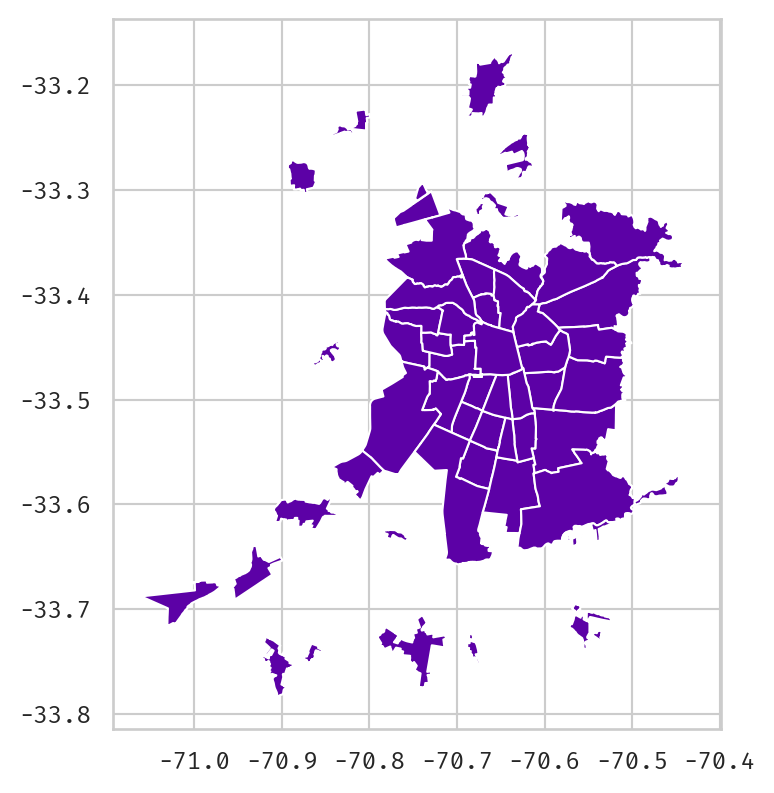

In [226]:
comunas = gpd.read_file('geod/filtered_communes.geojson')
comunas.plot()


/home/javiergonb/aves/src/aves/features/geo.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ).pipe(lambda x: x[x.geometry.area > 0])


<Axes: >

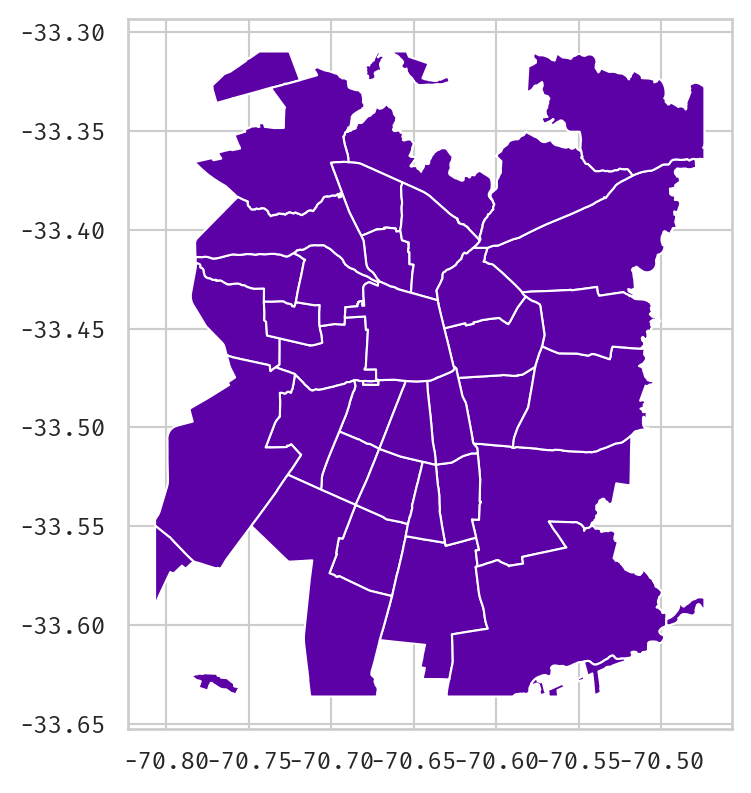

In [227]:
from aves.features.geo import clip_area_geodataframe

scl_bounds = [-70.806885,-33.636060,-70.473862,-33.309873]

comunas = clip_area_geodataframe(comunas, scl_bounds)
comunas.plot()

In [9]:
import pyrosm

osm = pyrosm.OSM(str(osm_clipped_file))

In [10]:
pois = osm.get_pois()

In [94]:
from aves.features.osm.pois import categorize_pois

cat_pois = categorize_pois(pois)
cat_pois

no match amenity telephone None
general match shop general
general match shop hardware
general match shop computer
no match building yes Castaño
general match shop yes
general match shop farm
no match amenity waste_transfer_station KDM
general match shop stationery
general match shop motorcycle
general match shop cosmetics
no match amenity school;kindergarten Colegio Madre de Jesús
general match shop toys
general match shop funeral_directors
no match amenity salon de belleza salon de belleza angel
general match shop gift
general match shop garden_centre
general match shop hifi
no match amenity vending_machine Máquina de Coca-Cola
no match amenity grave_yard Sodexo Chile
no match natural peak Cerro Tarapacá
general match shop tyres
no match highway elevator Ascensor Santa Lucía (closed)
no match amenity compressed_air None
general match shop gas
general match shop baby_goods
no match amenity internet_access Almacen Ciber Cafe
no match historic monument Casas de Calera de Tango
general m

,taxonomy,name,geometry
0,health,Lentes Online,POINT (-70.65112 -33.43955)
1,nightlife,Bar Ciudadano,POINT (-70.62849 -33.44622)
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654)
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654)
3,transport,Parada Colón Buses al Sur,POINT (-70.71517 -33.58955)
...,...,...,...
41326,transport:car,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3..."
41328,food,Odfjell Vineyards,"POLYGON ((-70.87753 -33.53971, -70.87754 -33.5..."
41329,religion,Catedral Metropolitana de Santiago de Chile,"POLYGON ((-70.65152 -33.43776, -70.65168 -33.4..."
41330,transport,None,"POLYGON ((-70.62382 -33.27129, -70.62376 -33.2..."


In [148]:
cat_pois_area = gpd.sjoin(cat_pois, comunas[["NOM_COMUNA", "geometry"]], op="within")
cat_pois_area


/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_1164/700801023.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4674

  cat_pois_area = gpd.sjoin(cat_pois, comunas[["NOM_COMUNA", "geometry"]], op="within")


,taxonomy,name,geometry,index_right,NOM_COMUNA
0,health,Lentes Online,POINT (-70.65112 -33.43955),51,SANTIAGO
1,nightlife,Bar Ciudadano,POINT (-70.62849 -33.44622),32,PROVIDENCIA
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),32,PROVIDENCIA
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),32,PROVIDENCIA
4,entertainment,Museo de los Tajamares,POINT (-70.63040 -33.43560),32,PROVIDENCIA
...,...,...,...,...,...
41325,transport,Aparcadero Municipal de Pedro Aguirre Cerda,"POLYGON ((-70.67769 -33.50711, -70.67741 -33.5...",16,PEDRO AGUIRRE CERDA
41325,transport:car,Aparcadero Municipal de Pedro Aguirre Cerda,"POLYGON ((-70.67769 -33.50711, -70.67741 -33.5...",16,PEDRO AGUIRRE CERDA
41326,transport,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",12,HUECHURABA
41326,transport:car,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",12,HUECHURABA


In [149]:
poi_counts = cat_pois_area['taxonomy'].value_counts()

# Print the results
print(poi_counts)
poi_counts = poi_counts[poi_counts > 0]
# Convert to DataFrame for further analysis or visualization if needed
poi_counts_df = poi_counts.reset_index()
poi_counts_df.columns = ['Category', 'Count']

taxonomy
professional                  8061
convenience                   5446
food                          5159
education                     4768
transport                     4191
public_facility               3663
transport:car                 3468
store                         1378
health                        1067
retail                         916
religion                       899
entertainment                  829
finance                        746
transport:bike                 604
recreation                     505
government                     477
nightlife                      402
accommodation                  371
money                          251
sustainability                 157
transport:taxi                  56
transport:moto                  26
transport:public                20
transport:bus                   19
food:coffee_shop                 4
food:burger                      2
food:cuisine:international       2
food:regional                    2
food:sandwi

/tmp/ipykernel_1164/3863023434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=poi_counts_df, x='Count', y='Category', palette='viridis')


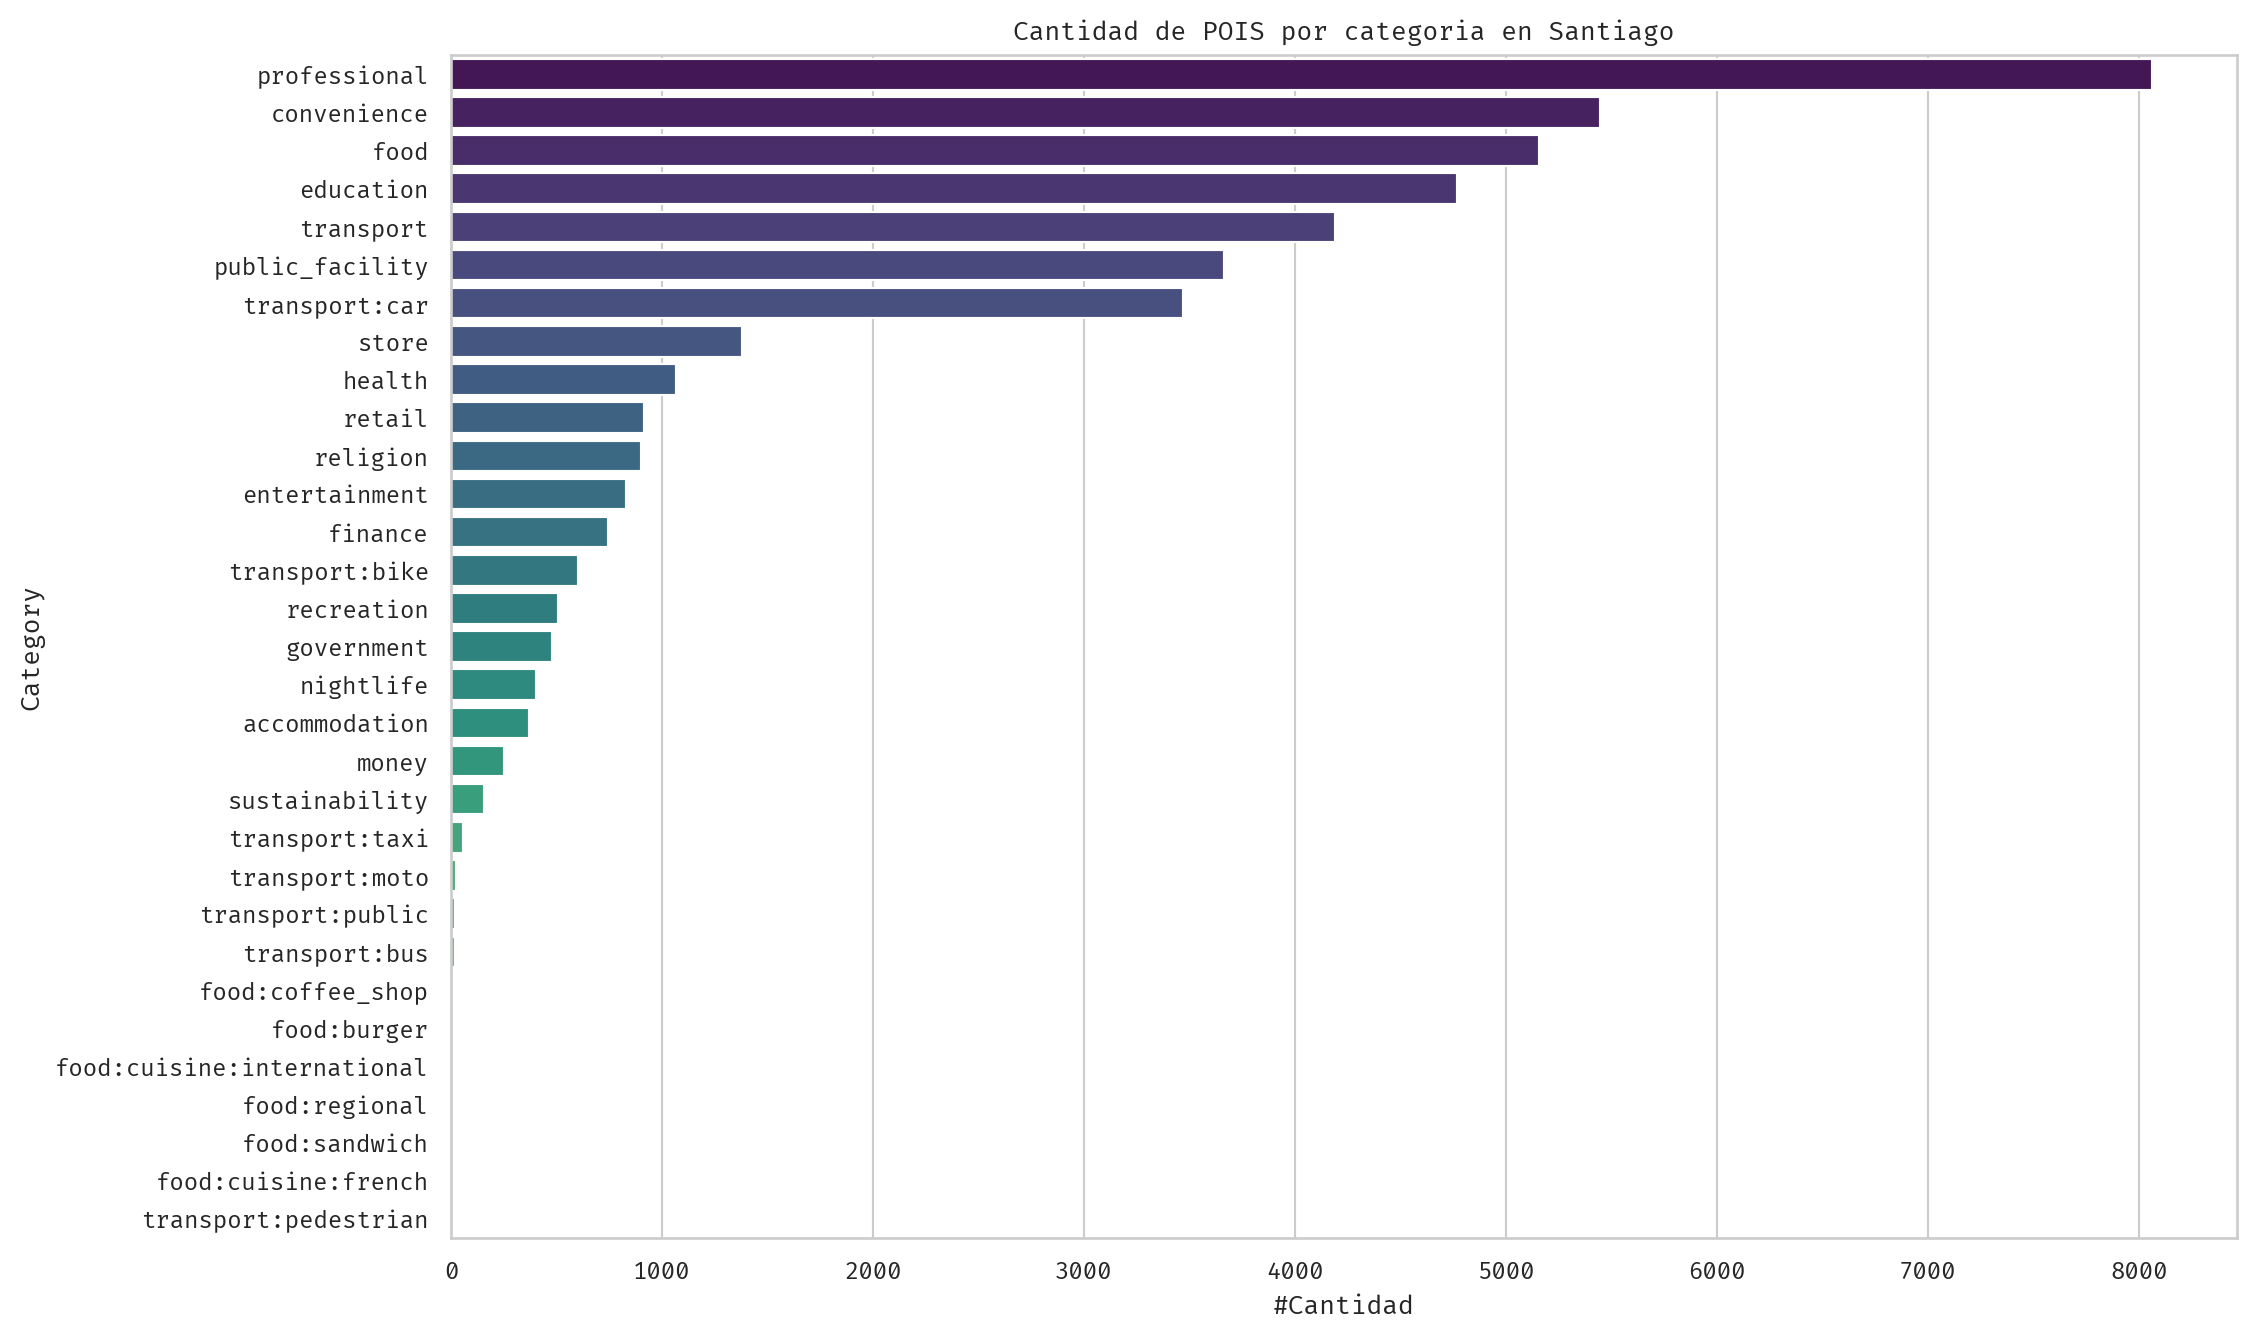

In [151]:
# Plotting the counts
plt.figure(figsize=(12, 8))
sns.barplot(data=poi_counts_df, x='Count', y='Category', palette='viridis')
plt.title('Cantidad de POIS por categoria en Santiago')
plt.xlabel('#Cantidad')
plt.ylabel('Category')
plt.show()

In [152]:
from aves.data import eod

viajes = eod.read_trips(EOD_PATH)

In [153]:
viajes

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion,DistEuclidiana,DistManhattan,Imputada,TipoDia,FactorExpansion
0,173431,17343102,1734310202,1,Maipú,Maipú,Poniente,Poniente,400,407,...,NaN,NaN,NaN,0.0,Bip!,5387,7608,0,Laboral,1.000000
1,173441,17344101,1734410101,2,Maipú,Las Condes,Poniente,Oriente,407,307,...,NaN,NaN,NaN,0.0,Bip!,18841,26100,0,Laboral,1.127220
2,173441,17344101,1734410102,2,Las Condes,Maipú,Oriente,Poniente,307,407,...,NaN,NaN,NaN,0.0,Bip!,18841,26100,0,Laboral,1.127220
3,173441,17344103,1734410301,2,Maipú,Ñuñoa,Poniente,Oriente,407,437,...,NaN,NaN,NaN,0.0,Bip!,13392,17589,0,Laboral,1.127220
4,173441,17344103,1734410302,2,Ñuñoa,Maipú,Oriente,Poniente,437,407,...,NaN,NaN,NaN,0.0,Bip!,13392,17589,0,Laboral,1.052764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113584,706791,70679101,7067910102,1,Cerro Navia,Cerro Navia,Poniente,Poniente,73,69,...,1.482104,NaN,NaN,NaN,Caminata,122,172,0,Domingo,1.482104
113585,743813,74381301,7438130101,1,La Granja,La Granja,Sur,Sur,244,235,...,1.482104,NaN,NaN,NaN,Caminata,680,811,0,Domingo,1.482104
113586,743813,74381301,7438130102,1,La Granja,La Granja,Sur,Sur,235,244,...,1.482104,NaN,NaN,NaN,Caminata,680,811,0,Domingo,1.482104
113587,743813,74381302,7438130201,1,La Granja,La Granja,Sur,Sur,244,235,...,1.482104,NaN,NaN,NaN,Caminata,680,811,0,Domingo,1.482104


In [154]:
people = eod.read_people(EOD_PATH)
people

,Hogar,Persona,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,...,TramoIngreso,IngresoFinal,TramoIngresoFinal,IngresoImputado,Factor_LaboralNormal,Factor_SabadoNormal,Factor_DomingoNormal,Factor_LaboralEstival,Factor_FindesemanaEstival,FactorPersona
0,100010,10001001,1958,Hombre,Jefe(a) de Hogar,2,3,2,2,4.0,...,Entre 200.001 y 400.000 pesos,240000,2,0,NaN,NaN,1668.2600,NaN,NaN,82.58553
1,100010,10001002,1956,Mujer,Cónyuge o pareja,5,1,2,2,5.0,...,NaN,0,0,0,NaN,NaN,852.1137,NaN,NaN,99.53422
2,100010,10001003,1982,Mujer,Hijo o Hija,0,1,2,2,7.0,...,Entre 200.001 y 400.000 pesos,210845,2,2,NaN,NaN,1609.1630,NaN,NaN,151.59367
3,100020,10002001,1954,Hombre,Jefe(a) de Hogar,4,3,2,2,4.0,...,Menos de 200.000 pesos,133000,1,0,169.50230,NaN,NaN,NaN,NaN,45.21325
4,100020,10002002,1961,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,Menos de 200.000 pesos,193000,1,0,43.26765,NaN,NaN,NaN,NaN,25.62248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60049,706791,70679101,1956,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,NaN,0,0,0,NaN,NaN,320.9519,NaN,NaN,17.87670
60050,706791,70679102,1955,Hombre,Jefe(a) de Hogar,0,1,2,2,5.0,...,Entre 200.001 y 400.000 pesos,396715,2,2,NaN,NaN,320.9519,NaN,NaN,21.07324
60051,743813,74381301,1943,Hombre,Jefe(a) de Hogar,2,1,2,2,5.0,...,Menos de 200.000 pesos,140369,1,2,NaN,NaN,281.4610,NaN,NaN,15.34897
60052,743813,74381302,1943,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,Menos de 200.000 pesos,177636,1,2,NaN,NaN,288.1693,NaN,NaN,17.30931


In [155]:
homes = eod.read_homes(EOD_PATH)
homes

,Hogar,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumVeh,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,1,1,0,2,53000.0,0,100000,0,450845,136.393738
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,1,3,0,1,NaN,0,120000,0,1019369,73.843597
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,0,0,3,NaN,0,70000,0,80000,180.722809
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,0,1,0,1,NaN,0,80000,0,559259,150.379059
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,0,0,1,NaN,0,117771,1,710309,122.001518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,0,1,1,1,NaN,0,100000,0,300000,75.526031
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,0,2,2,1,NaN,0,140000,0,695186,174.348663
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,0,0,1,NaN,0,200000,0,396715,71.358963
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,0,0,1,NaN,0,80000,0,318005,68.410446


In [157]:
tabla_completa = (viajes.merge(people)).merge(homes.drop("TipoDia", axis=1))
tabla_completa[['FactorExpansion', 'FactorPersona']].describe()

,FactorExpansion,FactorPersona
count,89774.000000,89775.00000
mean,1.205620,117.84197
std,0.224139,202.73535
min,0.817907,0.52032
25%,1.000000,30.66064
50%,1.127220,57.47303
75%,1.482104,119.58056
max,1.505878,3112.45044


In [158]:
viajes.groupby('TipoDia')['FactorExpansion'].describe()

,count,mean,std,min,25%,50%,75%,max
TipoDia,,,,,,,,
Domingo,4867.0,1.285977,0.215361,1.000000,1.052764,1.482104,1.482104,1.482104
FindesemanaEstival,3809.0,1.244856,0.219565,1.000000,1.000000,1.143880,1.482104,1.482104
Laboral,62828.0,1.192476,0.225988,0.817907,1.000000,1.127220,1.482104,1.505878
LaboralEstival,11629.0,1.200153,0.210438,1.000000,1.000000,1.127220,1.482104,1.482104
No Definido,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sábado,6641.0,1.258145,0.216213,1.000000,1.000000,1.143880,1.482104,1.482104


In [159]:
tabla_completa["Peso"] = tabla_completa["FactorExpansion"] * tabla_completa["FactorPersona"]
tabla_completa.groupby('TipoDia')['Peso'].describe()

,count,mean,std,min,25%,50%,75%,max
TipoDia,,,,,,,,
Domingo,4867.0,159.325254,300.647919,0.520320,37.658590,71.904213,150.835286,4066.176680
FindesemanaEstival,3809.0,133.529586,226.110385,0.711779,37.260590,68.552790,130.011667,2292.901778
Laboral,62828.0,147.489865,262.925477,0.431389,35.957344,68.275636,146.843572,4612.974967
LaboralEstival,11629.0,126.966698,226.336719,0.520320,33.894891,63.150817,126.003362,3138.796483
No Definido,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sábado,6641.0,127.076806,189.190694,0.520320,34.514954,67.160406,142.909190,2868.461773


In [160]:
tabla_completa['Proposito'].value_counts(normalize=True)

Proposito
volver a casa                   0.459821
Al trabajo                      0.184252
Al estudio                      0.076581
De compras                      0.069430
Trámites                        0.041883
Buscar o Dejar a alguien        0.035300
Visitar a alguien               0.033317
Recreación                      0.024551
De salud                        0.022935
Por trabajo                     0.016675
Otra actividad (especifique)    0.016363
Por estudio                     0.010660
Comer o Tomar algo              0.004823
Buscar o dejar algo             0.003409
Name: proportion, dtype: float64

/tmp/ipykernel_1164/1641948174.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, y='UnifiedCategory', x='Proportion', palette='viridis')


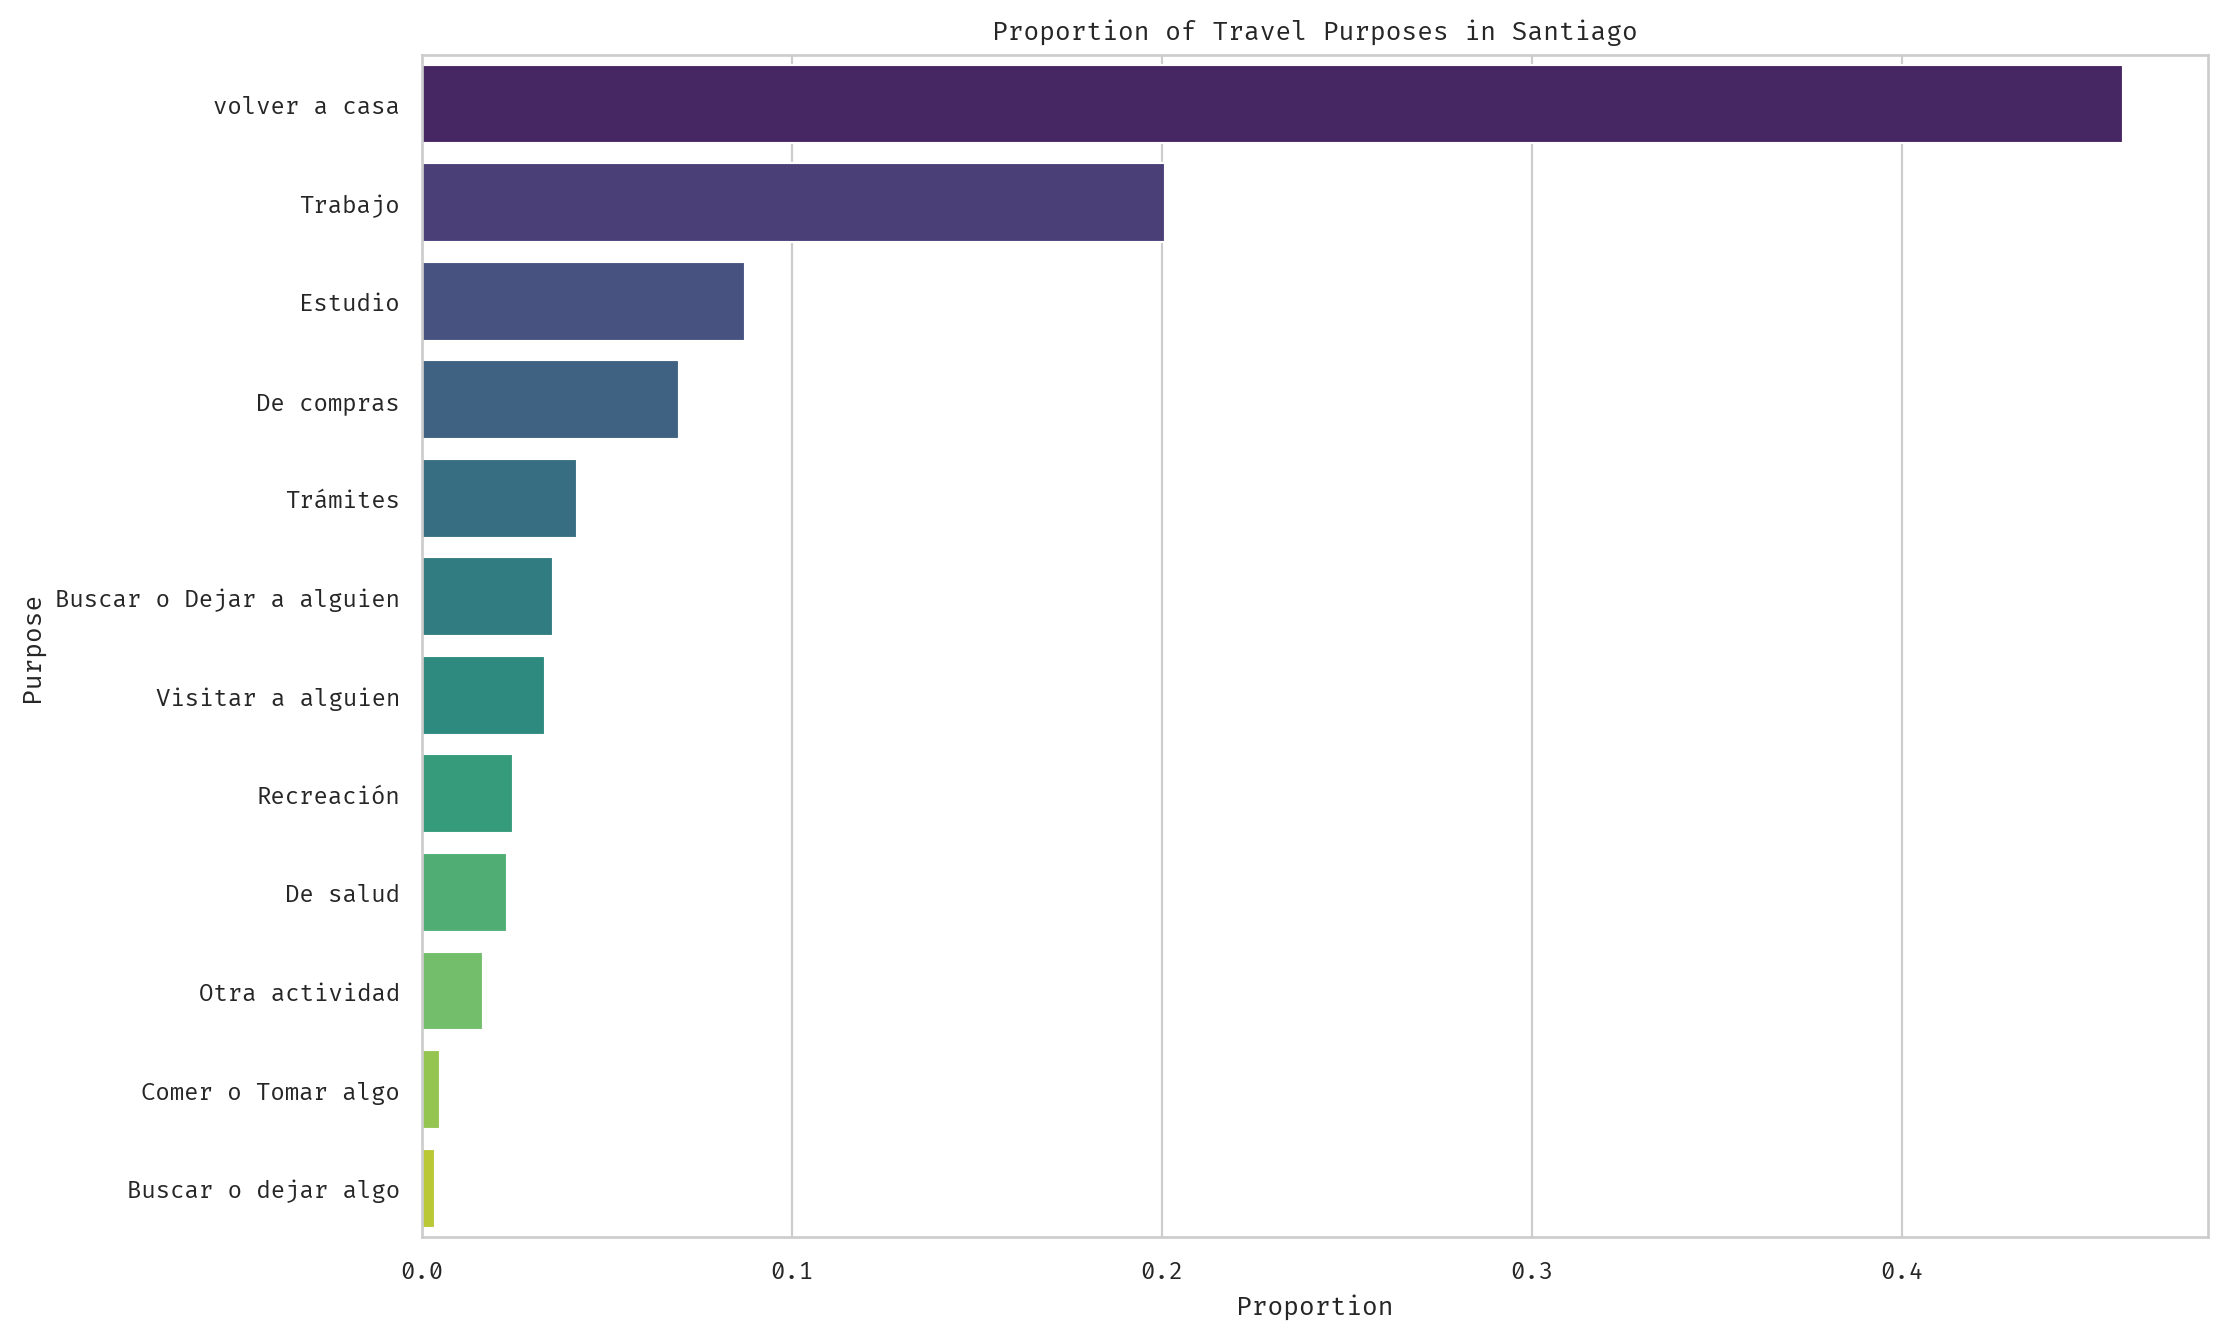

In [163]:

data = {
    'Proposito': [
        'volver a casa', 'Al trabajo', 'Al estudio', 'De compras', 'Trámites', 
        'Buscar o Dejar a alguien', 'Visitar a alguien', 'Recreación', 'De salud', 
        'Por trabajo', 'Otra actividad (especifique)', 'Por estudio', 'Comer o Tomar algo', 
        'Buscar o dejar algo'
    ],
    'Proportion': [
        0.459821, 0.184252, 0.076581, 0.069430, 0.041883, 
        0.035300, 0.033317, 0.024551, 0.022935, 0.016675, 
        0.016363, 0.010660, 0.004823, 0.003409
    ]
}

# Create DataFrame manually
df = pd.DataFrame(data)

# Mapping similar categories to a unified category
category_mapping = {
    'Al trabajo': 'Trabajo',
    'Por trabajo': 'Trabajo',
    'Al estudio': 'Estudio',
    'Por estudio': 'Estudio',
    'volver a casa': 'volver a casa',
    'De compras': 'De compras',
    'Trámites': 'Trámites',
    'Buscar o Dejar a alguien': 'Buscar o Dejar a alguien',
    'Visitar a alguien': 'Visitar a alguien',
    'Recreación': 'Recreación',
    'De salud': 'De salud',
    'Otra actividad (especifique)': 'Otra actividad',
    'Comer o Tomar algo': 'Comer o Tomar algo',
    'Buscar o dejar algo': 'Buscar o dejar algo'
}

# Apply the mapping
df['UnifiedCategory'] = df['Proposito'].map(category_mapping)

# Group by the unified category and sum the proportions
df_grouped = df.groupby('UnifiedCategory')['Proportion'].sum().reset_index()

# Sort values for better visualization
df_grouped = df_grouped.sort_values(by='Proportion', ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped, y='UnifiedCategory', x='Proportion', palette='viridis')
plt.title('Proportion of Travel Purposes in Santiago')
plt.xlabel('Proportion')
plt.ylabel('Purpose')
plt.show()

In [164]:
tabla_completa['ModoDifusion'].value_counts(normalize=True)

ModoDifusion
Bip!                    0.352270
Auto                    0.281415
Caminata                0.151579
Otros                   0.089457
Taxi Colectivo          0.038095
Bicicleta               0.031980
Bip! - Otros Público    0.025519
Taxi                    0.017989
Bip! - Otros Privado    0.011696
Name: proportion, dtype: float64

In [165]:
modo_comuna = (
    tabla_completa[tabla_completa["Proposito"] == "Al trabajo"]
    .drop_duplicates(subset='Persona', keep='first')
    .groupby(["Comuna", "ModoDifusion"])["Peso"]
    .sum()
    .unstack(fill_value=0)
)

modo_comuna

ModoDifusion,Auto,Bicicleta,Bip!,Bip! - Otros Privado,Bip! - Otros Público,Caminata,Otros,Taxi,Taxi Colectivo
Comuna,,,,,,,,,
BUIN,1824.105716,1826.723721,0.000000,0.000000,702.144519,1467.554158,5239.91868,0.000000,5944.428431
CALERA DE TANGO,1971.629854,621.771214,0.000000,16.158820,493.521766,1161.677464,2145.95420,0.000000,291.329418
CERRILLOS,9703.874003,520.033648,6511.663710,87.431490,40.535112,646.196849,1074.40780,73.972458,352.205110
CERRO NAVIA,10800.115134,1402.511578,20041.611448,1263.770440,302.395580,633.987394,1244.83879,0.000000,387.695813
COLINA,8078.890875,456.088920,0.000000,0.000000,5575.272880,2026.453935,17639.43572,502.411557,184.583376
CONCHALI,12102.803898,428.957086,19952.319996,0.000000,1967.303479,1815.860105,467.36618,105.864355,102.756385
EL BOSQUE,20587.535364,965.125366,18598.992850,1301.345118,1276.539888,2571.384947,7429.41043,180.507835,1405.975382
EL MONTE,2938.497080,792.299536,55.245320,0.000000,731.777155,415.906628,2231.74593,0.000000,735.431360
ESTACION CENTRAL,12205.617216,4848.738520,13695.624410,174.581208,201.299562,2097.953896,958.13213,31.385195,369.339968


In [166]:
tabla_completa["ModoAgregado"] = tabla_completa["ModoDifusion"].map(
    {
        "Taxi": "Taxi",
        "Bip! - Otros Privado": "Público",
        "Bip!": "Público",
        "Bip! - Otros Público": "Público",
        "Taxi Colectivo": "Taxi",
        "Bicicleta": "Caminata",
        "Caminata": "Caminata",
        "Auto": "Auto",
        "Otros": "Otros",
    }
)

modo_comuna = (
    tabla_completa[tabla_completa["Proposito"] == "Al trabajo"]
    .drop_duplicates(subset=['Persona'], keep='first')
    .groupby(["Comuna", "ModoAgregado"])
    ['Peso'].sum()
    .unstack(fill_value=0)
)

modo_comuna

ModoAgregado,Auto,Caminata,Otros,Público,Taxi
Comuna,,,,,
BUIN,1824.105716,3294.277879,5239.91868,702.144519,5944.428431
CALERA DE TANGO,1971.629854,1783.448677,2145.95420,509.680586,291.329418
CERRILLOS,9703.874003,1166.230497,1074.40780,6639.630312,426.177568
CERRO NAVIA,10800.115134,2036.498972,1244.83879,21607.777468,387.695813
COLINA,8078.890875,2482.542855,17639.43572,5575.272880,686.994933
CONCHALI,12102.803898,2244.817190,467.36618,21919.623474,208.620739
EL BOSQUE,20587.535364,3536.510313,7429.41043,21176.877856,1586.483217
EL MONTE,2938.497080,1208.206163,2231.74593,787.022475,735.431360
ESTACION CENTRAL,12205.617216,6946.692416,958.13213,14071.505180,400.725164


Text(0, 0.5, '# de Viajes')

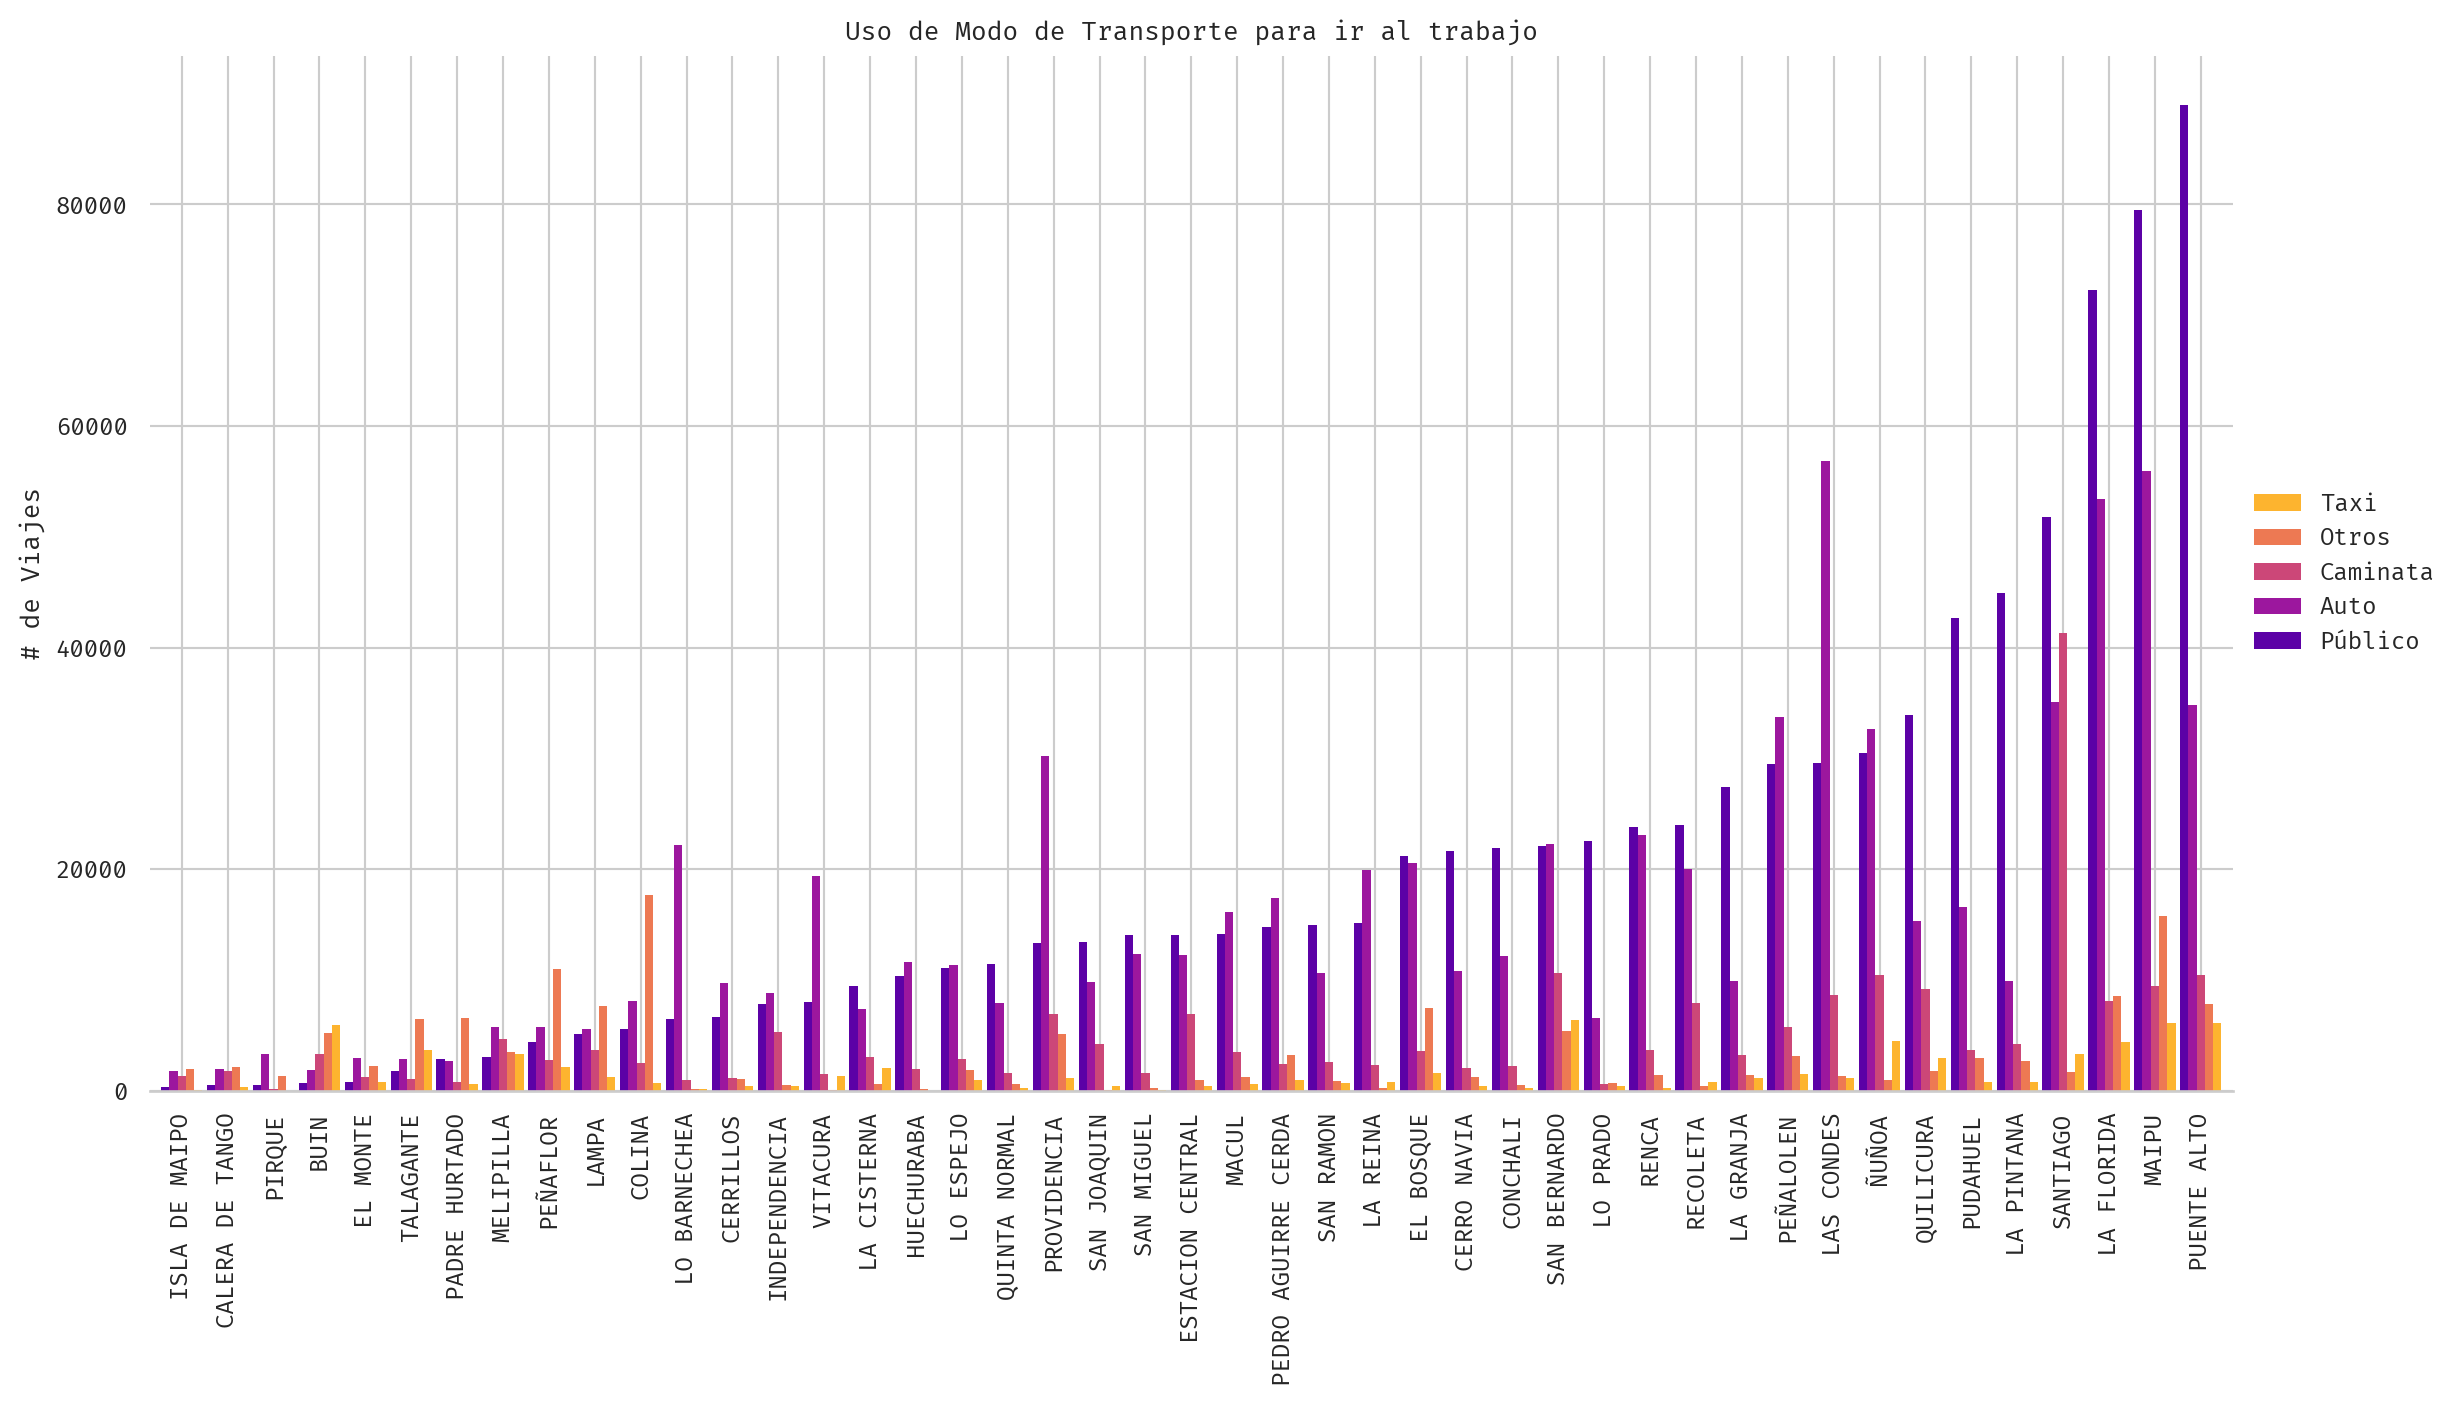

In [167]:
from aves.visualization.tables import barchart
fig, ax = plt.subplots(figsize=(14, 7))

barchart(
    ax,
    modo_comuna,
    sort_categories=True,
    sort_items=True,
)

ax.set_title("Uso de Modo de Transporte para ir al trabajo")
ax.set_xlabel("")
ax.set_ylabel("# de Viajes")

In [169]:
homes[['Comuna', 'IngresoHogar']].groupby('Comuna')['IngresoHogar'].mean().astype(int).sort_values()

Comuna
CERRO NAVIA             402763
LO PRADO                425104
EL MONTE                425345
ISLA DE MAIPO           434543
MELIPILLA               448839
ESTACION CENTRAL        449799
LA PINTANA              451238
QUINTA NORMAL           470784
LO ESPEJO               483427
EL BOSQUE               487032
RENCA                   487458
PEDRO AGUIRRE CERDA     491235
TALAGANTE               492734
SAN RAMON               501126
PADRE HURTADO           503274
SAN BERNARDO            504400
PUDAHUEL                517114
BUIN                    518300
LA GRANJA               528271
INDEPENDENCIA           537205
SAN JOAQUIN             539324
PEÑAFLOR                543580
CERRILLOS               546891
RECOLETA                552857
CALERA DE TANGO         566728
LA CISTERNA             575978
PUENTE ALTO             603372
COLINA                  604509
CONCHALI                614372
MAIPU                   625943
QUILICURA               646324
SANTIAGO                668670
L

In [197]:
homes = homes.rename(columns={"Comuna":"NOM_COMUNA"})

<Axes: ylabel='Comuna'>

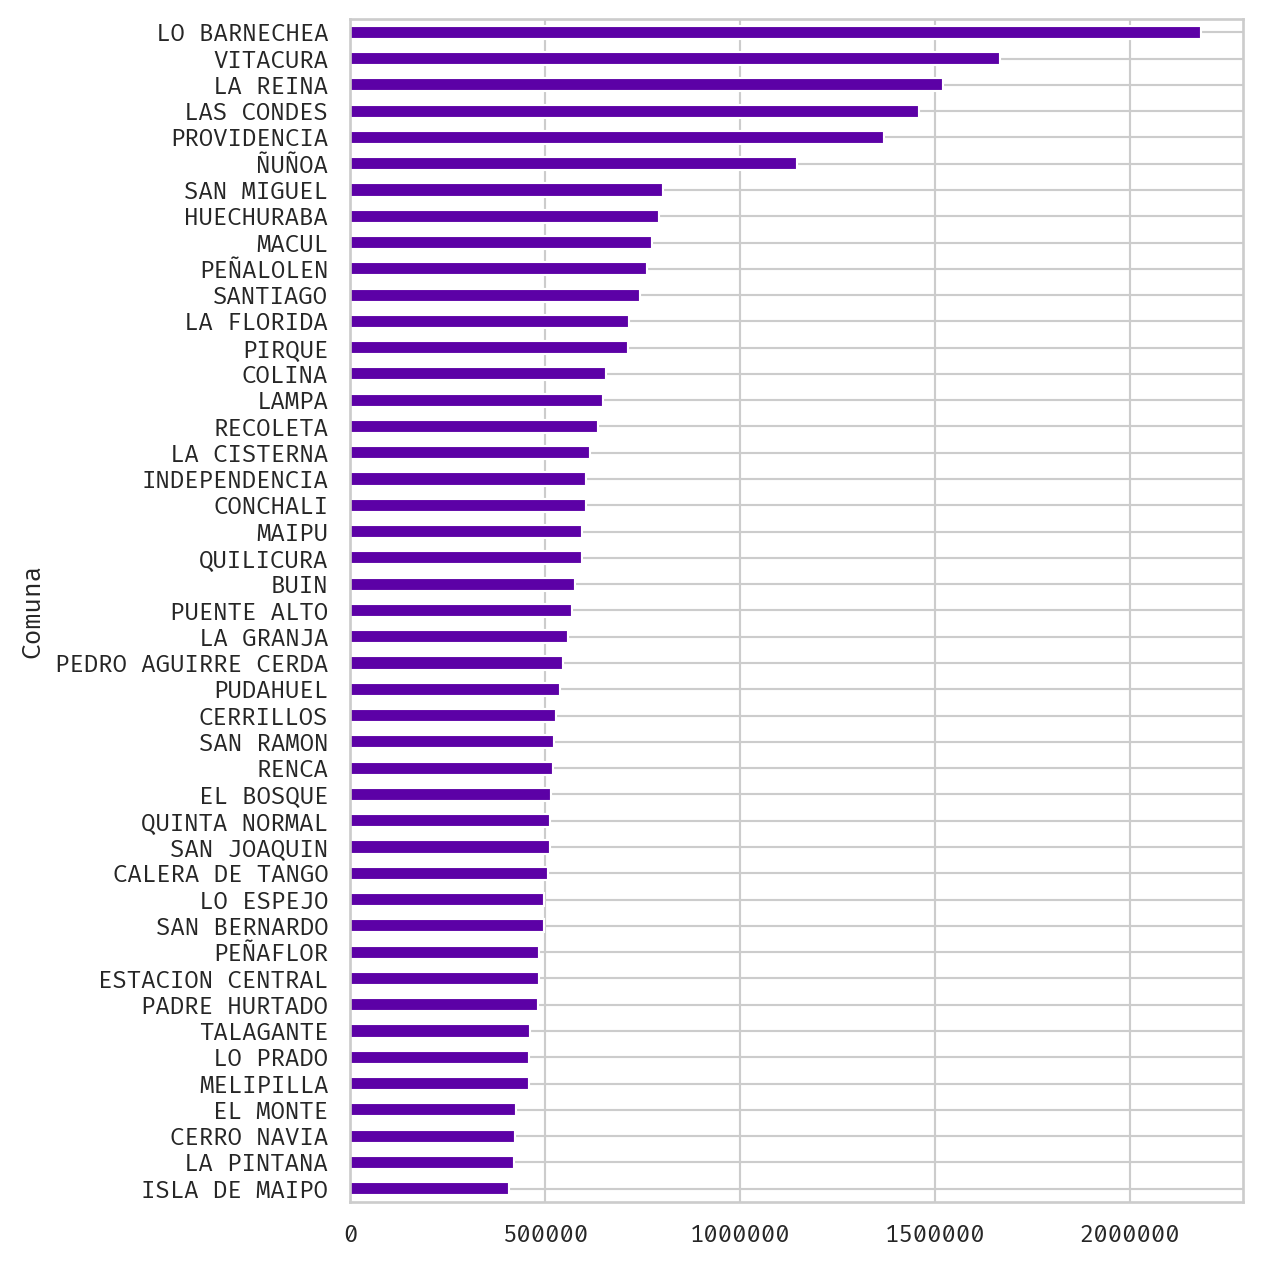

In [172]:
ingreso_por_comuna.sort_values().plot(kind='barh', figsize=(6,8))

In [17]:
cat_pois_area["taxonomy"].unique()

array(['health', 'nightlife', 'education', 'entertainment', 'convenience',
       'public_facility', 'accommodation', 'transport', 'transport:car',
       'finance', 'transport:public', 'transport:bus', 'professional',
       'money', 'food', 'religion', 'government', 'retail',
       'transport:taxi', 'store', 'transport:bike', 'sustainability',
       'recreation', 'food:coffee_shop', 'food:sandwich', 'food:burger',
       'food:cuisine:international', 'transport:moto', 'food:regional',
       'food:cuisine:french', 'transport:pedestrian'], dtype=object)

In [18]:
criteria = (
            (cat_pois_area["taxonomy"] == "health") |
            (cat_pois_area["taxonomy"] == "education") |
            (cat_pois_area["taxonomy"] == "food") |
            (cat_pois_area["taxonomy"] == "entertainment") |
            (cat_pois_area["taxonomy"] == "professional") |
            (cat_pois_area["taxonomy"] == "transport") |
            (cat_pois_area["taxonomy"] == "convenience") |
            (cat_pois_area["taxonomy"] == "transport:public") |
            (cat_pois_area["taxonomy"] == "'transport:bus'") 
            
            )
cat_pois_area_essentials = cat_pois_area.loc[criteria]
cat_pois_area_essentials['geometry'] = cat_pois_area_essentials['geometry'].centroid
cat_pois_area_essentials

/tmp/ipykernel_62945/2752149000.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cat_pois_area_essentials['geometry'] = cat_pois_area_essentials['geometry'].centroid
/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,taxonomy,name,geometry,index_right,NOM_COMUNA
0,health,Lentes Online,POINT (-70.65112 -33.43955),51,SANTIAGO
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),32,PROVIDENCIA
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),32,PROVIDENCIA
4,entertainment,Museo de los Tajamares,POINT (-70.63040 -33.43560),32,PROVIDENCIA
5,convenience,Farmacias Ahumada,POINT (-70.52505 -33.37624),27,LAS CONDES
...,...,...,...,...,...
41321,health,Hospital Clínico Universidad Católica,POINT (-70.64037 -33.44204),51,SANTIAGO
41322,food,Galería Comercial Arturo Prat,POINT (-70.64928 -33.44781),51,SANTIAGO
41323,entertainment,Palacio Larraín Mancheño,POINT (-70.66303 -33.44334),51,SANTIAGO
41325,transport,Aparcadero Municipal de Pedro Aguirre Cerda,POINT (-70.67709 -33.50711),16,PEDRO AGUIRRE CERDA


In [114]:
from shapely.geometry import Point
homes['geometry'] = homes.apply(lambda row: Point(row['DirCoordX'], row['DirCoordY']), axis=1)
homes = gpd.GeoDataFrame(homes, geometry='geometry', crs="EPSG:4326")
population_per_home = people.groupby('Hogar').size().reset_index(name='population')
homes_with_population = homes.merge(population_per_home, on='Hogar')
homes_with_population

,Hogar,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry,population
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,0,2,53000.0,0,100000,0,450845,136.393738,POINT (335180.80190 6266420.97500),3
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,0,1,NaN,0,120000,0,1019369,73.843597,POINT (338410.21140 6265607.14100),5
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,3,NaN,0,70000,0,80000,180.722809,POINT (327863.82480 6257800.08600),1
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,0,1,NaN,0,80000,0,559259,150.379059,POINT (327864.00000 6257800.00000),5
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,1,NaN,0,117771,1,710309,122.001518,POINT (338480.81520 6267296.94100),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,1,NaN,0,100000,0,300000,75.526031,POINT (339104.10110 6263063.92500),5
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,2,1,NaN,0,140000,0,695186,174.348663,POINT (338539.17410 6299539.20300),6
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,1,NaN,0,200000,0,396715,71.358963,POINT (338563.22010 6299580.11800),2
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,1,NaN,0,80000,0,318005,68.410446,POINT (349410.28120 6289668.96200),2


In [117]:
homes= homes_with_population.rename(columns={'Hogar': 'id'}).drop_duplicates(subset=['id'])
homes

,id,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry,population
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,0,2,53000.0,0,100000,0,450845,136.393738,POINT (335180.80190 6266420.97500),3
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,0,1,NaN,0,120000,0,1019369,73.843597,POINT (338410.21140 6265607.14100),5
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,3,NaN,0,70000,0,80000,180.722809,POINT (327863.82480 6257800.08600),1
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,0,1,NaN,0,80000,0,559259,150.379059,POINT (327864.00000 6257800.00000),5
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,1,NaN,0,117771,1,710309,122.001518,POINT (338480.81520 6267296.94100),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,1,NaN,0,100000,0,300000,75.526031,POINT (339104.10110 6263063.92500),5
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,2,1,NaN,0,140000,0,695186,174.348663,POINT (338539.17410 6299539.20300),6
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,1,NaN,0,200000,0,396715,71.358963,POINT (338563.22010 6299580.11800),2
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,1,NaN,0,80000,0,318005,68.410446,POINT (349410.28120 6289668.96200),2


In [118]:
from pyproj import Transformer

# Convert x, y coordinates to geometry
def transform_coordinates(x, y):
    transformer = Transformer.from_crs("EPSG:32719", "EPSG:4326", always_xy=True)  # UTM to WGS84
    lon, lat = transformer.transform(x, y)
    return Point(lon, lat)


In [119]:
homes['geometry'] = homes.apply(lambda row: transform_coordinates(row['DirCoordX'], row['DirCoordY']), axis=1)
homes

,id,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry,population
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,0,2,53000.0,0,100000,0,450845,136.393738,POINT (-70.77903 -33.72944),3
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,0,1,NaN,0,120000,0,1019369,73.843597,POINT (-70.74434 -33.73728),5
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,3,NaN,0,70000,0,80000,180.722809,POINT (-70.85966 -33.80599),1
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,0,1,NaN,0,80000,0,559259,150.379059,POINT (-70.85965 -33.80599),5
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,1,NaN,0,117771,1,710309,122.001518,POINT (-70.74327 -33.72205),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,1,NaN,0,100000,0,300000,75.526031,POINT (-70.73731 -33.76031),5
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,2,1,NaN,0,140000,0,695186,174.348663,POINT (-70.73681 -33.43139),6
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,1,NaN,0,200000,0,396715,71.358963,POINT (-70.73654 -33.43102),2
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,1,NaN,0,80000,0,318005,68.410446,POINT (-70.62157 -33.52196),2


In [120]:
# Convert to GeoDataFrame
homes_gdf = gpd.GeoDataFrame(homes, geometry='geometry')
homes_gdf.crs = "EPSG:4326"

In [123]:
criteria = (
            (cat_pois_area["taxonomy"] == "convenience") |
            (cat_pois_area["taxonomy"] == "store")
            
            
            )
work_pois = cat_pois_area.loc[criteria]
work_pois['geometry'] = work_pois['geometry'].centroid
work_pois

/tmp/ipykernel_100770/1288292950.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  work_pois['geometry'] = work_pois['geometry'].centroid


,taxonomy,name,geometry,index_right,NOM_COMUNA
5,convenience,Farmacias Ahumada,POINT (-70.52505 -33.37624),27,LAS CONDES
7,convenience,Montserrat,POINT (-70.54157 -33.39012),27,LAS CONDES
11,convenience,Farmacias Ahumada,POINT (-70.57208 -33.41864),27,LAS CONDES
12,convenience,Coliseo,POINT (-70.57194 -33.41898),27,LAS CONDES
14,convenience,SalcoBrand,POINT (-70.57693 -33.42643),27,LAS CONDES
...,...,...,...,...,...
41160,store,Entel,POINT (-70.56982 -33.40733),27,LAS CONDES
41209,convenience,Lo Saldes,POINT (-70.56267 -33.41699),27,LAS CONDES
41214,convenience,La Reinita,POINT (-70.71893 -33.40132),42,RENCA
41229,convenience,Farmacia Rosario,POINT (-70.65872 -33.41124),17,INDEPENDENCIA


In [124]:
work_pois['unique_id'] = range(len(work_pois))
work_pois

,taxonomy,name,geometry,index_right,NOM_COMUNA,unique_id
5,convenience,Farmacias Ahumada,POINT (-70.52505 -33.37624),27,LAS CONDES,0
7,convenience,Montserrat,POINT (-70.54157 -33.39012),27,LAS CONDES,1
11,convenience,Farmacias Ahumada,POINT (-70.57208 -33.41864),27,LAS CONDES,2
12,convenience,Coliseo,POINT (-70.57194 -33.41898),27,LAS CONDES,3
14,convenience,SalcoBrand,POINT (-70.57693 -33.42643),27,LAS CONDES,4
...,...,...,...,...,...,...
41160,store,Entel,POINT (-70.56982 -33.40733),27,LAS CONDES,6819
41209,convenience,Lo Saldes,POINT (-70.56267 -33.41699),27,LAS CONDES,6820
41214,convenience,La Reinita,POINT (-70.71893 -33.40132),42,RENCA,6821
41229,convenience,Farmacia Rosario,POINT (-70.65872 -33.41124),17,INDEPENDENCIA,6822


In [121]:
homes_with_communes = gpd.sjoin(homes_gdf, comunas, how='inner', op='within')

/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_1164/3965859454.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4674

  homes_with_communes = gpd.sjoin(homes_gdf, comunas, how='inner', op='within')


<Axes: >

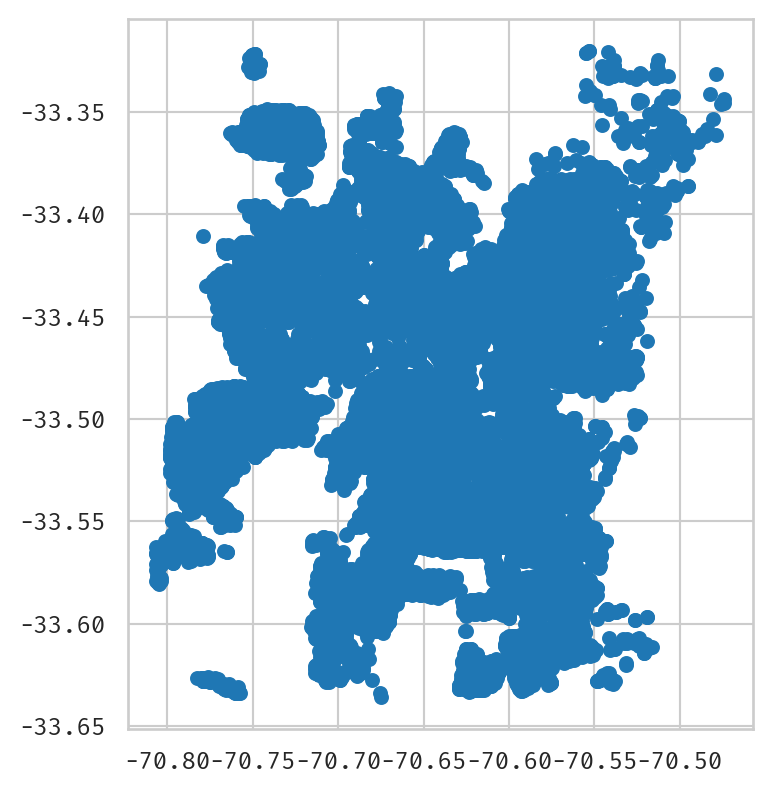

In [122]:
homes_with_communes.plot()

/home/javiergonb/aves/src/aves/features/geo.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ).pipe(lambda x: x[x.geometry.area > 0])


<Axes: >

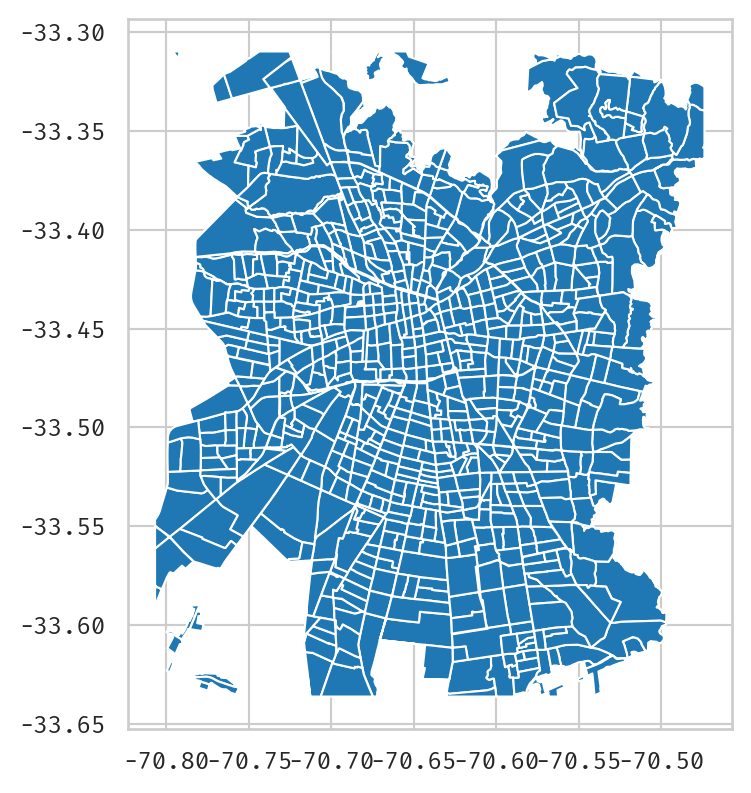

In [123]:
scl_bounds = [-70.806885,-33.636060,-70.473862,-33.309873]

zones_in_communes = clip_area_geodataframe(zones_orig, scl_bounds)
zones_in_communes.plot()

In [124]:
zones_in_communes['geometry'] = zones_in_communes['geometry'].centroid
zones_in_communes

/tmp/ipykernel_1164/1461569591.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zones_in_communes['geometry'] = zones_in_communes['geometry'].centroid


,ID,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2,geometry
0,103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,4.575649e+05,POINT (-70.65851 -33.55806)
1,104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.725462e+05,POINT (-70.67185 -33.55424)
2,106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,2.693838e+06,POINT (-70.68875 -33.56184)
3,115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.534193e+05,POINT (-70.67869 -33.55099)
4,116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.184305e+05,POINT (-70.66524 -33.55684)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,375,906.8750,375.0,13118,Macul,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13118,MACUL,MACUL,CAPITAL COMUNAL,CIUDAD,0.150721,0.001246,4.226369e+05,POINT (-70.60291 -33.49843)
860,366,933.2500,366.0,13118,Macul,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13118,MACUL,MACUL,CAPITAL COMUNAL,CIUDAD,0.150721,0.001246,1.599908e+06,POINT (-70.61446 -33.47975)
861,364,678.7500,364.0,13118,Macul,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13118,MACUL,MACUL,CAPITAL COMUNAL,CIUDAD,0.150721,0.001246,6.572471e+05,POINT (-70.59355 -33.47671)
862,369,793.2500,369.0,13118,Macul,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13118,MACUL,MACUL,CAPITAL COMUNAL,CIUDAD,0.150721,0.001246,6.393742e+05,POINT (-70.59403 -33.48268)


In [130]:
full_cost_computer = TravelTimeMatrixComputer(
    network,
    # todos los orígenes
    origins=zones_in_communes.rename(columns={'ID': 'id'}).drop_duplicates(subset=['id']),
    # solo celdas con hospitales
    destinations=work_pois.rename(columns={'unique_id': 'id'}).drop_duplicates(subset=['id']),
    departure=datetime.datetime(2018, 7, 10, 8, 30),
    transport_modes=[TransportMode.TRANSIT, TransportMode.WALK],
)
travel_time_matrix = full_cost_computer.compute_travel_times()

/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/r5py/r5/regional_task.py:223: RuntimeWarning: Departure time 2018-07-10 08:30:00 is outside of the time range covered by currently loaded GTFS data sets.
  warnings.warn(


In [131]:
travel_time_matrix

,from_id,to_id,travel_time
0,103,0,NaN
1,103,1,NaN
2,103,2,NaN
3,103,3,NaN
4,103,4,NaN
...,...,...,...
5158939,365,6819,NaN
5158940,365,6820,NaN
5158941,365,6821,NaN
5158942,365,6822,NaN


In [132]:
zone_commune_mapping = zones_in_communes[['ID', 'Comuna']]
zone_commune_mapping

,ID,Comuna
0,103,El Bosque
1,104,El Bosque
2,106,El Bosque
3,115,El Bosque
4,116,El Bosque
...,...,...
859,375,Macul
860,366,Macul
861,364,Macul
862,369,Macul


In [ ]:
travel_times_with_communes = travel_time_matrix.merge(zone_commune_mapping, left_on='from_id', right_on='ID')

: 

In [97]:
travel_times_with_communes

,from_id,to_id,travel_time,ID,Comuna
0,103,0,NaN,103,El Bosque
1,103,1,NaN,103,El Bosque
2,103,2,NaN,103,El Bosque
3,103,3,NaN,103,El Bosque
4,103,4,NaN,103,El Bosque
...,...,...,...,...,...
3310885,365,4186,118.0,365,Macul
3310886,365,4187,NaN,365,Macul
3310887,365,4188,NaN,365,Macul
3310888,365,4189,NaN,365,Macul


In [98]:
len(comunas["NOM_COMUNA"].unique())

40

In [99]:
len(travel_times_with_communes["Comuna"].unique())

39

In [100]:
def calculate_accessibility_index(travel_times_df, max_travel_time=45):
    accessibility_index = travel_times_df.groupby('Comuna')['travel_time'].apply(
        lambda x: (x <= max_travel_time).sum() 
    )
    return accessibility_index

# Calculate accessibility index
accessibility_index = calculate_accessibility_index(travel_times_with_communes)

In [101]:
len(accessibility_index)

39

In [102]:
accessibility_per_commune = accessibility_index.reset_index()
accessibility_per_commune.columns = ['Comuna', 'accesibility']
accessibility_per_commune["Comuna"] = accessibility_per_commune["Comuna"].str.upper()

In [103]:
accessibility_per_commune

,Comuna,accesibility
0,CALERA DE TANGO,21
1,CERRILLOS,657
2,CERRO NAVIA,1024
3,COLINA,48
4,CONCHALÍ,970
5,EL BOSQUE,872
6,ESTACIÓN CENTRAL,1752
7,HUECHURABA,468
8,INDEPENDENCIA,1725
9,LA CISTERNA,952


In [127]:
people_homes = people.merge(homes_with_communes, left_on='Hogar', right_on='id', suffixes=('', '_home'))
people_homes

,Hogar,Persona,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,...,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area
0,101660,10166001,1946,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13403,CALERA DE TANGO,BAJOS DE SAN AGUSTÍN,URBANO,CIUDAD,0.079742,0.000154
1,101660,10166002,1956,Hombre,Jefe(a) de Hogar,2,1,2,2,4.0,...,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13403,CALERA DE TANGO,BAJOS DE SAN AGUSTÍN,URBANO,CIUDAD,0.079742,0.000154
2,101660,10166003,1985,Hombre,Hijo o Hija,2,1,2,2,5.0,...,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13403,CALERA DE TANGO,BAJOS DE SAN AGUSTÍN,URBANO,CIUDAD,0.079742,0.000154
3,101660,10166004,1965,Hombre,Hijo o Hija,2,1,2,2,4.0,...,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13403,CALERA DE TANGO,BAJOS DE SAN AGUSTÍN,URBANO,CIUDAD,0.079742,0.000154
4,101671,10167101,1947,Hombre,Jefe(a) de Hogar,2,1,2,2,4.0,...,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13403,CALERA DE TANGO,BAJOS DE SAN AGUSTÍN,URBANO,CIUDAD,0.079742,0.000154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53061,706791,70679101,1956,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,CERRO NAVIA,CAPITAL COMUNAL,CIUDAD,0.170180,0.001076
53062,706791,70679102,1955,Hombre,Jefe(a) de Hogar,0,1,2,2,5.0,...,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,CERRO NAVIA,CAPITAL COMUNAL,CIUDAD,0.170180,0.001076
53063,743813,74381301,1943,Hombre,Jefe(a) de Hogar,2,1,2,2,5.0,...,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13111,LA GRANJA,LA GRANJA,CAPITAL COMUNAL,CIUDAD,0.135456,0.000980
53064,743813,74381302,1943,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13111,LA GRANJA,LA GRANJA,CAPITAL COMUNAL,CIUDAD,0.135456,0.000980


In [128]:
population_per_commune = homes['Comuna'].value_counts()
population_df = population_per_commune.reset_index()
population_df.columns = ['Comuna', 'population']

In [179]:
population_df

,NOM_COMUNA,population
0,PUENTE ALTO,1662
1,MAIPU,1466
2,LA FLORIDA,1039
3,SANTIAGO,998
4,LAS CONDES,888
5,SAN BERNARDO,762
6,PUDAHUEL,630
7,ÑUÑOA,603
8,QUILICURA,570
9,LA PINTANA,545


In [181]:
population_df['NOM_COMUNA'] = population_df['NOM_COMUNA'].replace({
    'CONCHALI': 'CONCHALÍ',
    'ESTACION CENTRAL': 'ESTACIÓN CENTRAL',
    'PEÑALOLEN' : 'PEÑALOLÉN',
    'MAIPU' : 'MAIPÚ',
    'SAN RAMON' : 'SAN RAMÓN',
    'SAN JOAQUIN' : 'SAN JOAQUÍN'

})

In [182]:
merged_df = pd.merge(accessibility_per_commune, population_df, on='Comuna')
merged_df

NameError: name 'accessibility_per_commune' is not defined

In [177]:
merged_df['accessibility_index'] = merged_df['accesibility'] / merged_df['population']
merged_df

NameError: name 'merged_df' is not defined

In [176]:
work_accsesability_df = merged_df[["Comuna","accessibility_index"]]

NameError: name 'merged_df' is not defined

In [110]:
work_accsesability_df['Comuna'] = work_accsesability_df['Comuna'].replace({
    'CONCHALI': 'CONCHALÍ',
    'ESTACION CENTRAL': 'ESTACIÓN CENTRAL',
    'PEÑALOLEN' : 'PEÑALOLÉN',
    'MAIPU' : 'MAIPÚ',
    'SAN RAMON' : 'SAN RAMÓN',
    'SAN JOAQUIN' : 'SAN JOAQUÍN'

})

In [230]:
ingreso_por_comuna = (
    homes.groupby("NOM_COMUNA")
    .apply(
        lambda x: (x["FactorHogar"] * x["IngresoHogar"]).sum() / x["FactorHogar"].sum()
    )
    .rename("ingreso")
    .astype(int)
)

ingreso_por_comuna.sort_values()

/tmp/ipykernel_1164/1296261121.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


NOM_COMUNA
ISLA DE MAIPO           407419
LA PINTANA              419354
CERRO NAVIA             421367
EL MONTE                424736
MELIPILLA               459430
LO PRADO                459634
TALAGANTE               460640
PADRE HURTADO           482747
ESTACION CENTRAL        483239
PEÑAFLOR                484696
SAN BERNARDO            496299
LO ESPEJO               497818
CALERA DE TANGO         505995
SAN JOAQUIN             512128
QUINTA NORMAL           512784
EL BOSQUE               514362
RENCA                   520308
SAN RAMON               523237
CERRILLOS               528750
PUDAHUEL                537591
PEDRO AGUIRRE CERDA     546292
LA GRANJA               559155
PUENTE ALTO             568515
BUIN                    575351
QUILICURA               594006
MAIPU                   595384
CONCHALI                605069
INDEPENDENCIA           605773
LA CISTERNA             616074
RECOLETA                635069
LAMPA                   648293
COLINA                  6552

In [231]:
ingreso_por_comuna = pd.DataFrame(ingreso_por_comuna)

In [232]:
ingreso_por_comuna = ingreso_por_comuna.reset_index()
ingreso_por_comuna.columns = ['NOM_COMUNA', 'ingreso']

In [233]:
ingreso_por_comuna

,NOM_COMUNA,ingreso
0,BUIN,575351
1,CALERA DE TANGO,505995
2,CERRILLOS,528750
3,CERRO NAVIA,421367
4,COLINA,655243
5,CONCHALI,605069
6,EL BOSQUE,514362
7,EL MONTE,424736
8,ESTACION CENTRAL,483239
9,HUECHURABA,791845


In [237]:
ingreso_por_comuna['NOM_COMUNA'] = ingreso_por_comuna['NOM_COMUNA'].replace({
    'CONCHALI': 'CONCHALÍ',
    'ESTACION CENTRAL': 'ESTACIÓN CENTRAL',
    'PEÑALOLEN' : 'PEÑALOLÉN',
    'MAIPU' : 'MAIPÚ',
    'SAN RAMON' : 'SAN RAMÓN',
    'SAN JOAQUIN' : 'SAN JOAQUÍN'

})

In [238]:
ingreso_por_comuna

,NOM_COMUNA,ingreso
0,BUIN,575351
1,CALERA DE TANGO,505995
2,CERRILLOS,528750
3,CERRO NAVIA,421367
4,COLINA,655243
5,CONCHALÍ,605069
6,EL BOSQUE,514362
7,EL MONTE,424736
8,ESTACIÓN CENTRAL,483239
9,HUECHURABA,791845


In [228]:
comunas["NOM_COMUNA"].unique()

array(['CERRO NAVIA', 'PUDAHUEL', 'COLINA', 'LAMPA', 'HUECHURABA',
       'CONCHALÍ', 'EL BOSQUE', 'ESTACIÓN CENTRAL', 'PEDRO AGUIRRE CERDA',
       'INDEPENDENCIA', 'LO ESPEJO', 'LA CISTERNA', 'LA PINTANA',
       'LA FLORIDA', 'LA GRANJA', 'MACUL', 'PEÑALOLÉN', 'LAS CONDES',
       'LO BARNECHEA', 'LA REINA', 'ÑUÑOA', 'RECOLETA', 'PROVIDENCIA',
       'CERRILLOS', 'MAIPÚ', 'LO PRADO', 'VITACURA', 'QUINTA NORMAL',
       'PADRE HURTADO', 'PUENTE ALTO', 'QUILICURA', 'RENCA',
       'CALERA DE TANGO', 'SAN BERNARDO', 'SAN JOSÉ DE MAIPO', 'PIRQUE',
       'SAN JOAQUÍN', 'SAN MIGUEL', 'SAN RAMÓN', 'SANTIAGO'], dtype=object)

In [239]:
merged_df= pd.merge(comunas,ingreso_por_comuna[['NOM_COMUNA', 'ingreso']],on='NOM_COMUNA')



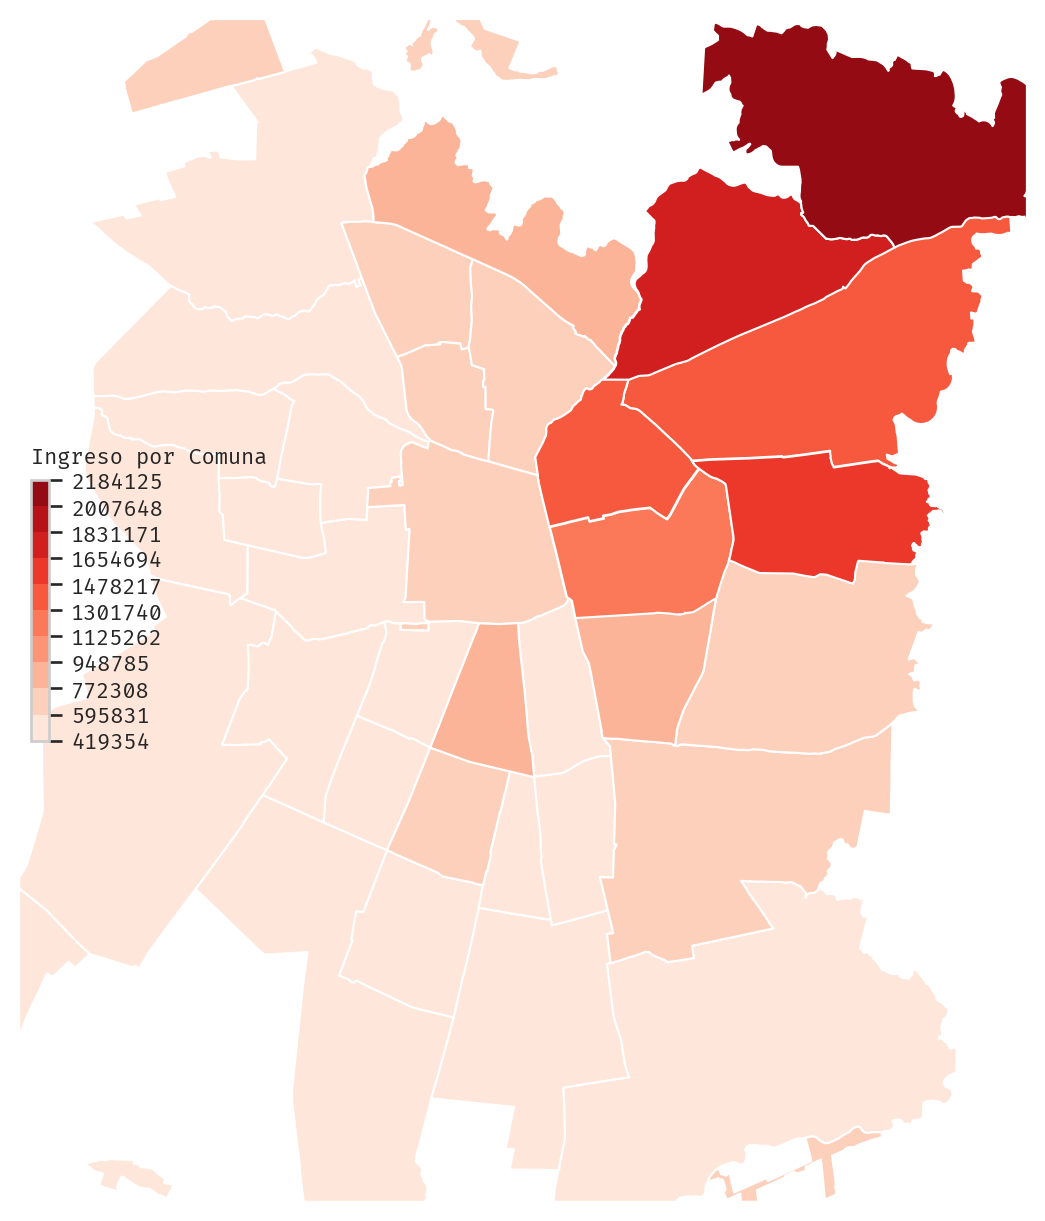

In [240]:
fig, ax = figure_from_geodataframe(comunas, height=8)

choropleth_map(
    ax, merged_df, "ingreso", edgecolor="white",linewidth=0.8, scheme="quantiles",cbar_args=dict(
        label="Ingreso por Comuna",
        height="22%",
        width="2%",
        orientation="vertical",
        location="center left",
        label_size="small",
        bbox_to_anchor=(0.0, 0.0, 0.9, 1.0),
        
    ),
)


mpl.rcParams["font.family"] = "Fira Code"

In [112]:
# Assuming you have a DataFrame named df
work_accsesability_df.to_json("accesability_dfs/transport_accses.json", force_ascii=False, orient='records')

In [113]:
work_accsesability_df= work_accsesability_df.rename(columns={"Comuna":"NOM_COMUNA"})

In [114]:
work_accsesability_df["NOM_COMUNA"].unique()

array(['CALERA DE TANGO', 'CERRILLOS', 'CERRO NAVIA', 'CONCHALÍ',
       'EL BOSQUE', 'ESTACIÓN CENTRAL', 'HUECHURABA', 'INDEPENDENCIA',
       'LA CISTERNA', 'LA FLORIDA', 'LA GRANJA', 'LA PINTANA', 'LA REINA',
       'LAMPA', 'LAS CONDES', 'LO BARNECHEA', 'LO ESPEJO', 'LO PRADO',
       'MACUL', 'MAIPÚ', 'PADRE HURTADO', 'PEDRO AGUIRRE CERDA',
       'PEÑALOLÉN', 'PIRQUE', 'PROVIDENCIA', 'PUDAHUEL', 'PUENTE ALTO',
       'QUILICURA', 'QUINTA NORMAL', 'RECOLETA', 'RENCA', 'SAN BERNARDO',
       'SAN JOAQUÍN', 'SAN MIGUEL', 'SAN RAMÓN', 'SANTIAGO', 'VITACURA',
       'ÑUÑOA'], dtype=object)

In [115]:
len(zones_in_communes["Comuna"].unique())

39

In [116]:
comunas_gdf = comunas.merge(work_accsesability_df, on='NOM_COMUNA',how='left')

In [47]:
school_df = pd.read_json("accesability_dfs/school_accses.json", orient='records')
school_df = school_df.rename(columns={'accessibility_index':'schools_accsesability'})
school_df= school_df.rename(columns={"Comuna":"NOM_COMUNA"})

tramite_df = pd.read_json("accesability_dfs/tramite_accses.json", orient='records')
tramite_df = tramite_df.rename(columns={'accessibility_index':'tramite_accsesability'})
tramite_df= tramite_df.rename(columns={"Comuna":"NOM_COMUNA"})

pro_df = pd.read_json("accesability_dfs/pro_accses.json", orient='records')
pro_df = pro_df.rename(columns={'accessibility_index':'pro_accsesability'})
pro_df= pro_df.rename(columns={"Comuna":"NOM_COMUNA"})

shop_df = pd.read_json("accesability_dfs/shop_accses.json", orient='records')
shop_df = shop_df.rename(columns={'accessibility_index':'shop_accsesability'})
shop_df= shop_df.rename(columns={"Comuna":"NOM_COMUNA"})

transport_df = pd.read_json("accesability_dfs/transport_accses.json", orient='records')
transport_df = transport_df.rename(columns={'accessibility_index':'transport_accsesability'})
transport_df= transport_df.rename(columns={"Comuna":"NOM_COMUNA"})


In [48]:
comunas_gdf = comunas.merge(pro_df, on='NOM_COMUNA',how='left')

In [49]:
comunas_gdf = comunas_gdf.merge(school_df, on='NOM_COMUNA',how='left')

In [50]:
comunas_gdf = comunas_gdf.merge(tramite_df, on='NOM_COMUNA',how='left')

In [51]:
comunas_gdf = comunas_gdf.merge(shop_df, on='NOM_COMUNA',how='left')

In [52]:
comunas_gdf = comunas_gdf.merge(transport_df, on='NOM_COMUNA',how='left')

In [53]:
comunas_gdf

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,geometry,pro_accsesability,schools_accsesability,tramite_accsesability,shop_accsesability,transport_accsesability
0,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,CERRO NAVIA,CAPITAL COMUNAL,CIUDAD,0.170180,0.001076,"POLYGON ((-70.71888 -33.41359, -70.71869 -33.4...",3.167528,2.139607,0.271975,3.263702,1.058945
1,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,PUDAHUEL,CAPITAL COMUNAL,CIUDAD,0.183893,0.001552,"POLYGON ((-70.78133 -33.41712, -70.78131 -33.4...",1.091912,0.827731,0.082458,1.313025,0.786765
2,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,CHAMISERO,URBANO,CIUDAD,0.178211,0.000369,"MULTIPOLYGON (((-70.65390 -33.31075, -70.65372...",NaN,NaN,NaN,NaN,NaN
3,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,VALLE GRANDE,URBANO,CIUDAD,0.137442,0.000876,"POLYGON ((-70.72393 -33.31342, -70.72391 -33.3...",0.382979,0.297872,0.042553,0.319149,0.404255
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,CHICAUMA,URBANO,CIUDAD,0.047445,0.000130,"POLYGON ((-70.74432 -33.30991, -70.74486 -33.3...",0.382979,0.297872,0.042553,0.319149,0.404255
5,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,HUECHURABA,HUECHURABA,CAPITAL COMUNAL,CIUDAD,0.309947,0.002129,"POLYGON ((-70.66324 -33.33880, -70.66324 -33.3...",0.870968,0.709677,0.061935,1.081290,0.603871
6,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,CONCHALÍ,CONCHALÍ,CAPITAL COMUNAL,CIUDAD,0.138248,0.001077,"POLYGON ((-70.69028 -33.36581, -70.69016 -33.3...",2.860196,1.917186,0.152271,2.229742,0.863758
7,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65468 -33.5...",1.095946,1.537162,0.077703,1.387162,0.589189
8,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,ESTACIÓN CENTRAL,ESTACIÓN CENTRAL,CAPITAL COMUNAL,CIUDAD,0.190249,0.001392,"POLYGON ((-70.67958 -33.44389, -70.67958 -33.4...",5.737279,3.089304,0.218069,4.501558,1.819315
9,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,CAPITAL COMUNAL,CIUDAD,0.127968,0.000850,"POLYGON ((-70.65571 -33.47856, -70.65575 -33.4...",3.124877,2.676500,0.511308,2.316618,1.956735


In [61]:
cat_pois_comunas = gpd.sjoin(cat_pois, comunas[["NOM_COMUNA", "geometry"]], op="within")
cat_pois_comunas


/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_1164/1857340855.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4674

  cat_pois_comunas = gpd.sjoin(cat_pois, comunas[["NOM_COMUNA", "geometry"]], op="within")


,taxonomy,name,geometry,index_right,NOM_COMUNA
0,health,Lentes Online,POINT (-70.65112 -33.43955),51,SANTIAGO
1,nightlife,Bar Ciudadano,POINT (-70.62849 -33.44622),32,PROVIDENCIA
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),32,PROVIDENCIA
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),32,PROVIDENCIA
4,entertainment,Museo de los Tajamares,POINT (-70.63040 -33.43560),32,PROVIDENCIA
...,...,...,...,...,...
41325,transport,Aparcadero Municipal de Pedro Aguirre Cerda,"POLYGON ((-70.67769 -33.50711, -70.67741 -33.5...",16,PEDRO AGUIRRE CERDA
41325,transport:car,Aparcadero Municipal de Pedro Aguirre Cerda,"POLYGON ((-70.67769 -33.50711, -70.67741 -33.5...",16,PEDRO AGUIRRE CERDA
41326,transport,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",12,HUECHURABA
41326,transport:car,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",12,HUECHURABA


In [62]:
from aves.features.utils import normalize_rows, logodds_ratio_with_uninformative_dirichlet_prior
comunas_pois = (
    cat_pois_area.groupby(["index_right", "taxonomy"])
    .size()
    .unstack(fill_value=0)
    .pipe(logodds_ratio_with_uninformative_dirichlet_prior)
)
comunas_pois

taxonomy,accommodation,convenience,education,entertainment,finance,food,food:burger,food:coffee_shop,food:cuisine:french,food:cuisine:international,...,store,sustainability,transport,transport:bike,transport:bus,transport:car,transport:moto,transport:pedestrian,transport:public,transport:taxi
2,-0.108973,7.482614,2.343142,-1.117198,-2.390338,-3.635084,-0.056656,-0.063588,-0.049723,-0.056656,...,-3.116161,-0.100324,-1.730262,-2.173004,-0.079173,-0.651066,0.999590,-0.049723,-0.079686,-0.089991
3,-1.684065,5.971860,1.353305,-1.961379,-2.583560,-2.842057,-0.058754,-0.065686,-0.051822,-0.058754,...,-3.578851,-0.102422,4.503862,-1.698491,1.107639,5.369047,0.793790,-0.051822,1.056485,1.017511
7,-0.069402,0.431564,0.626046,-0.077549,-0.076474,-0.096902,-0.017086,-0.024018,-0.010155,-0.017086,...,-0.082760,-0.060753,2.523186,-0.074330,-0.039603,2.862228,-0.042741,-0.010155,-0.040116,-0.050421
10,-0.085506,-0.200337,0.174456,-0.093653,-0.092578,0.352350,-0.033189,-0.040121,-0.026258,-0.033189,...,-0.652699,-0.076856,1.816491,-0.090434,-0.055706,2.416106,-0.058845,-0.026258,-0.056220,-0.066524
12,-1.903641,1.242420,-1.928624,-0.719713,-0.347150,-1.298671,-0.058900,-0.065832,-0.051968,-0.058900,...,2.579152,0.730457,4.104834,-2.236143,1.093420,5.089788,2.077198,-0.051968,1.042246,0.006148
13,-1.525361,3.455153,6.255576,-0.363585,-1.041951,-3.213884,-0.055121,-0.062053,-0.048188,-0.055121,...,-2.372934,-0.098789,-3.516068,-2.019201,-0.077638,-2.614186,-0.080777,-0.048188,-0.078151,-0.088456
14,-0.109913,3.600044,10.565883,2.255237,-1.919749,-2.798840,-0.057595,-0.064527,-0.050662,-0.057595,...,-2.275766,1.607731,-0.580576,-1.738715,-0.080112,-0.305939,-0.083251,-0.050662,-0.080626,3.887083
15,-0.373435,2.275804,1.854195,0.727673,-1.792029,0.014412,-0.060941,-0.067873,-0.054009,-0.060941,...,-3.544905,-0.761389,-0.543275,-2.188228,4.419974,-0.023558,-0.086597,-0.054009,4.333949,-0.196253
16,-0.107188,-2.517718,2.687492,1.000183,-1.621894,-5.980619,-0.054870,-0.061803,-0.047938,-0.054870,...,-2.080677,3.498694,6.012490,1.787690,-0.077388,5.688013,-0.080526,-0.047938,-0.077901,1.556968
17,-1.834053,-0.485899,-0.846196,-1.292379,-2.291376,-1.105451,-0.058205,-0.065137,-0.051272,-0.058205,...,-0.180978,-0.101873,-1.077969,-1.273164,1.161104,-0.899349,0.847664,-0.051272,2.530057,-0.091540


In [96]:
from scipy.stats import entropy
from aves.features.utils import standardize_columns
comunas_entropy = (
    cat_pois_area.groupby(["index_right", "taxonomy"])
    .size()
    .unstack(fill_value=0)
    .apply(entropy, axis=1)
    .rename("poi_diversity")
    .to_frame()
    .pipe(standardize_columns)
    
    
)


In [68]:
cat_pois_comunas

,taxonomy,name,geometry,index_right,NOM_COMUNA
0,health,Lentes Online,POINT (-70.65112 -33.43955),51,SANTIAGO
1,nightlife,Bar Ciudadano,POINT (-70.62849 -33.44622),32,PROVIDENCIA
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),32,PROVIDENCIA
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),32,PROVIDENCIA
4,entertainment,Museo de los Tajamares,POINT (-70.63040 -33.43560),32,PROVIDENCIA
...,...,...,...,...,...
41325,transport,Aparcadero Municipal de Pedro Aguirre Cerda,"POLYGON ((-70.67769 -33.50711, -70.67741 -33.5...",16,PEDRO AGUIRRE CERDA
41325,transport:car,Aparcadero Municipal de Pedro Aguirre Cerda,"POLYGON ((-70.67769 -33.50711, -70.67741 -33.5...",16,PEDRO AGUIRRE CERDA
41326,transport,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",12,HUECHURABA
41326,transport:car,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",12,HUECHURABA


In [97]:
comunas_entropy

,poi_diversity
index_right,
0,-2.463383
1,0.584281
2,-0.235775
3,-0.063660
4,-1.302281
5,-0.035253
6,-0.557329
7,-2.839319
8,-1.316362


In [70]:
comunas

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,geometry
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,CERRO NAVIA,CAPITAL COMUNAL,CIUDAD,0.170180,0.001076,"POLYGON ((-70.71888 -33.41359, -70.71869 -33.4..."
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,PUDAHUEL,CAPITAL COMUNAL,CIUDAD,0.183893,0.001552,"POLYGON ((-70.78133 -33.41712, -70.78131 -33.4..."
7,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,CHAMISERO,URBANO,CIUDAD,0.178211,0.000369,"MULTIPOLYGON (((-70.65390 -33.31075, -70.65372..."
10,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,VALLE GRANDE,URBANO,CIUDAD,0.137442,0.000876,"POLYGON ((-70.72393 -33.31342, -70.72391 -33.3..."
11,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,CHICAUMA,URBANO,CIUDAD,0.047445,0.000130,"POLYGON ((-70.74432 -33.30991, -70.74486 -33.3..."
12,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,HUECHURABA,HUECHURABA,CAPITAL COMUNAL,CIUDAD,0.309947,0.002129,"POLYGON ((-70.66324 -33.33880, -70.66324 -33.3..."
13,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,CONCHALÍ,CONCHALÍ,CAPITAL COMUNAL,CIUDAD,0.138248,0.001077,"POLYGON ((-70.69028 -33.36581, -70.69016 -33.3..."
14,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65468 -33.5..."
15,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,ESTACIÓN CENTRAL,ESTACIÓN CENTRAL,CAPITAL COMUNAL,CIUDAD,0.190249,0.001392,"POLYGON ((-70.67958 -33.44389, -70.67958 -33.4..."
16,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,CAPITAL COMUNAL,CIUDAD,0.127968,0.000850,"POLYGON ((-70.65571 -33.47856, -70.65575 -33.4..."


In [80]:
cat_pois_comunas

,taxonomy,name,geometry,index_right,NOM_COMUNA
0,health,Lentes Online,POINT (-70.65112 -33.43955),51,SANTIAGO
1,nightlife,Bar Ciudadano,POINT (-70.62849 -33.44622),32,PROVIDENCIA
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),32,PROVIDENCIA
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),32,PROVIDENCIA
4,entertainment,Museo de los Tajamares,POINT (-70.63040 -33.43560),32,PROVIDENCIA
...,...,...,...,...,...
41325,transport,Aparcadero Municipal de Pedro Aguirre Cerda,"POLYGON ((-70.67769 -33.50711, -70.67741 -33.5...",16,PEDRO AGUIRRE CERDA
41325,transport:car,Aparcadero Municipal de Pedro Aguirre Cerda,"POLYGON ((-70.67769 -33.50711, -70.67741 -33.5...",16,PEDRO AGUIRRE CERDA
41326,transport,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",12,HUECHURABA
41326,transport:car,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",12,HUECHURABA


In [85]:
comunas

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,geometry
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,CERRO NAVIA,CAPITAL COMUNAL,CIUDAD,0.170180,0.001076,"POLYGON ((-70.71888 -33.41359, -70.71869 -33.4..."
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,PUDAHUEL,CAPITAL COMUNAL,CIUDAD,0.183893,0.001552,"POLYGON ((-70.78133 -33.41712, -70.78131 -33.4..."
7,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,CHAMISERO,URBANO,CIUDAD,0.178211,0.000369,"MULTIPOLYGON (((-70.65390 -33.31075, -70.65372..."
10,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,VALLE GRANDE,URBANO,CIUDAD,0.137442,0.000876,"POLYGON ((-70.72393 -33.31342, -70.72391 -33.3..."
11,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,CHICAUMA,URBANO,CIUDAD,0.047445,0.000130,"POLYGON ((-70.74432 -33.30991, -70.74486 -33.3..."
12,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,HUECHURABA,HUECHURABA,CAPITAL COMUNAL,CIUDAD,0.309947,0.002129,"POLYGON ((-70.66324 -33.33880, -70.66324 -33.3..."
13,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,CONCHALÍ,CONCHALÍ,CAPITAL COMUNAL,CIUDAD,0.138248,0.001077,"POLYGON ((-70.69028 -33.36581, -70.69016 -33.3..."
14,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65468 -33.5..."
15,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,ESTACIÓN CENTRAL,ESTACIÓN CENTRAL,CAPITAL COMUNAL,CIUDAD,0.190249,0.001392,"POLYGON ((-70.67958 -33.44389, -70.67958 -33.4..."
16,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,CAPITAL COMUNAL,CIUDAD,0.127968,0.000850,"POLYGON ((-70.65571 -33.47856, -70.65575 -33.4..."


In [87]:
comunas.join(comunas_entropy)

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,geometry,poi_diversity
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,CERRO NAVIA,CAPITAL COMUNAL,CIUDAD,0.170180,0.001076,"POLYGON ((-70.71888 -33.41359, -70.71869 -33.4...",-0.355894
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,PUDAHUEL,CAPITAL COMUNAL,CIUDAD,0.183893,0.001552,"POLYGON ((-70.78133 -33.41712, -70.78131 -33.4...",-0.190312
7,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,CHAMISERO,URBANO,CIUDAD,0.178211,0.000369,"MULTIPOLYGON (((-70.65390 -33.31075, -70.65372...",-3.231709
10,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,VALLE GRANDE,URBANO,CIUDAD,0.137442,0.000876,"POLYGON ((-70.72393 -33.31342, -70.72391 -33.3...",-0.555646
11,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,CHICAUMA,URBANO,CIUDAD,0.047445,0.000130,"POLYGON ((-70.74432 -33.30991, -70.74486 -33.3...",NaN
12,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,HUECHURABA,HUECHURABA,CAPITAL COMUNAL,CIUDAD,0.309947,0.002129,"POLYGON ((-70.66324 -33.33880, -70.66324 -33.3...",0.686389
13,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,CONCHALÍ,CONCHALÍ,CAPITAL COMUNAL,CIUDAD,0.138248,0.001077,"POLYGON ((-70.69028 -33.36581, -70.69016 -33.3...",-0.400478
14,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65468 -33.5...",0.132741
15,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,ESTACIÓN CENTRAL,ESTACIÓN CENTRAL,CAPITAL COMUNAL,CIUDAD,0.190249,0.001392,"POLYGON ((-70.67958 -33.44389, -70.67958 -33.4...",0.444219
16,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,CAPITAL COMUNAL,CIUDAD,0.127968,0.000850,"POLYGON ((-70.65571 -33.47856, -70.65575 -33.4...",0.498494


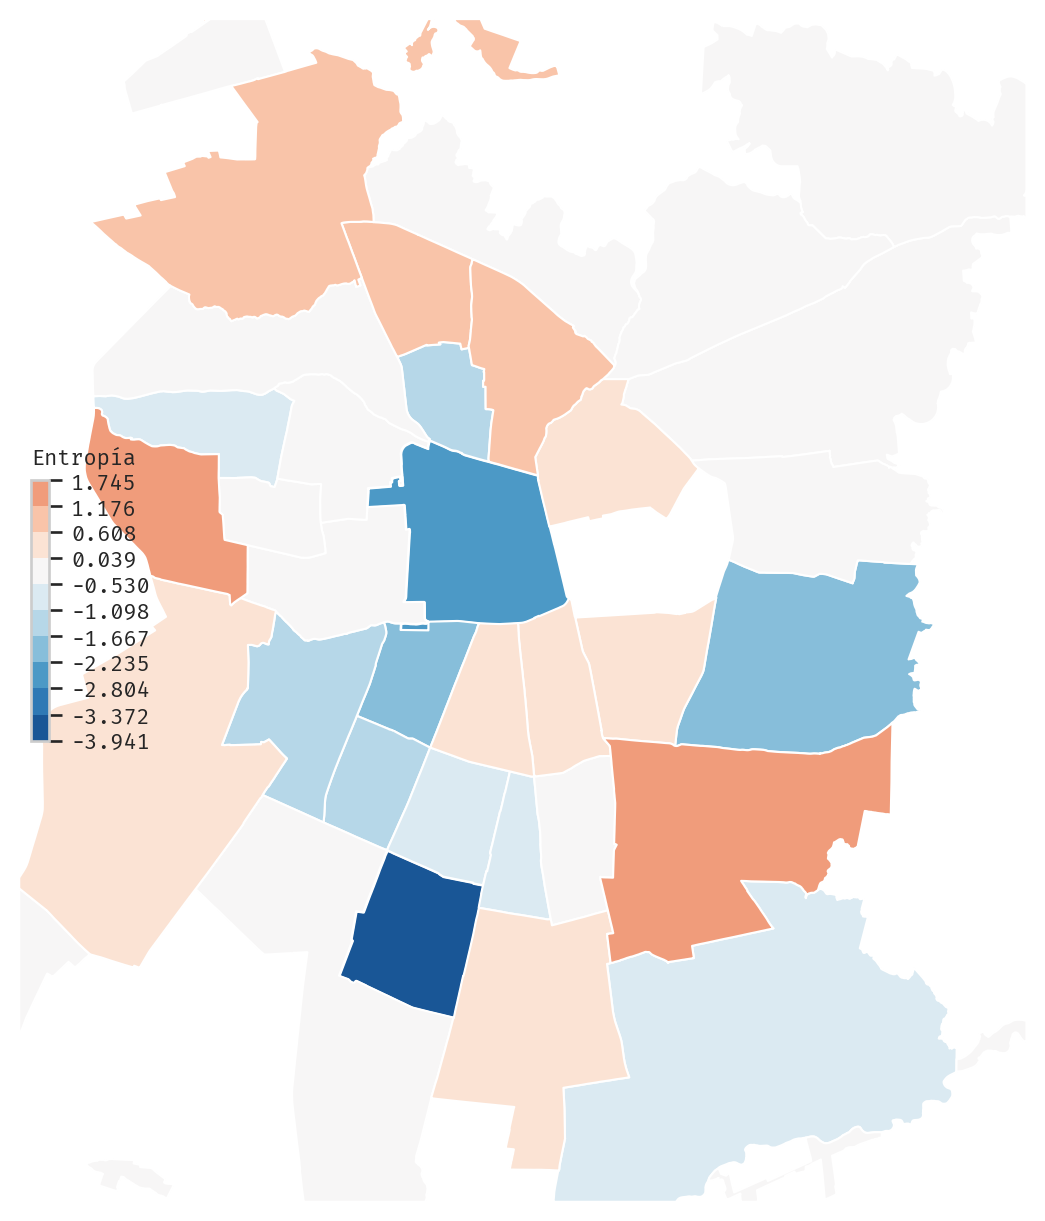

In [106]:
import matplotlib.patheffects as path_effects


comunas_entropy = (
    cat_pois_area.groupby(["index_right", "taxonomy"])
    .size()
    .unstack(fill_value=0)
    .apply(entropy, axis=1)
    .rename("poi_diversity")
    .to_frame()
    .pipe(standardize_columns)
    
    
)






fig, ax = figure_from_geodataframe(comunas, height=8)

choropleth_map(
    ax, comunas.join(comunas_entropy), "poi_diversity", edgecolor="white",linewidth=0.8, scheme="quantiles",cbar_args=dict(
        label="Entropía",
        height="22%",
        width="2%",
        orientation="vertical",
        location="center left",
        label_size="small",
        bbox_to_anchor=(0.0, 0.0, 0.9, 1.0),
        
    ),
)


mpl.rcParams["font.family"] = "Fira Code"




/tmp/ipykernel_1164/381953275.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


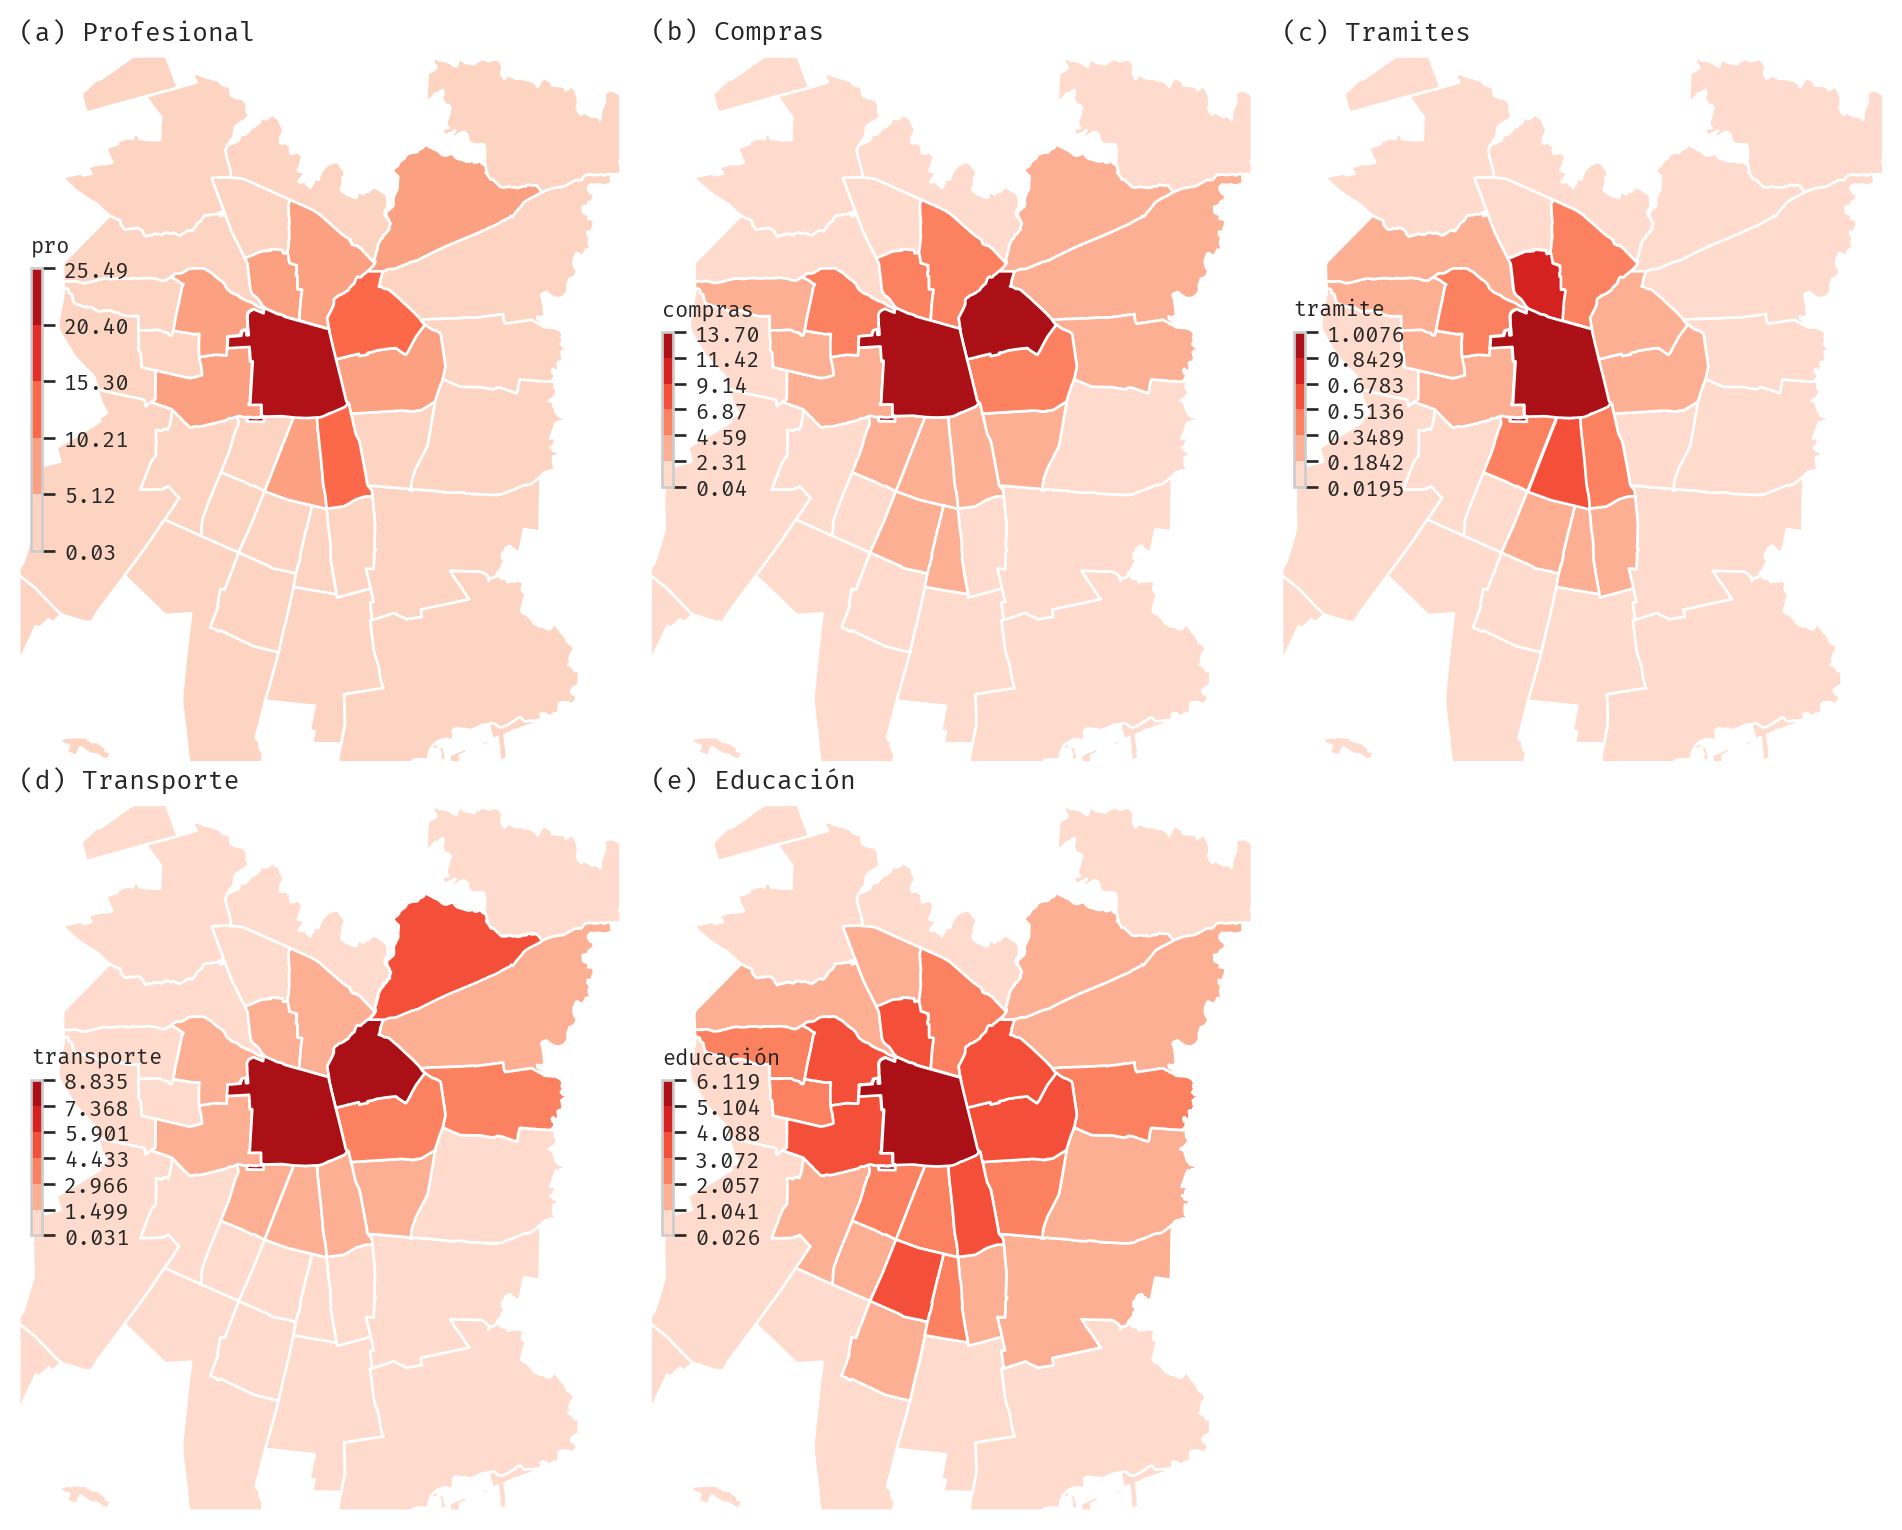

In [146]:
from aves.visualization.figures import figure_from_geodataframe
from aves.visualization.maps import choropleth_map
from aves.visualization.figures import small_multiples_from_geodataframe




plots_to_create = [
    ("(a) Profesional", comunas_gdf, "pro_accsesability","pro",5,"40%","2%"),
    ("(b) Compras", comunas_gdf, "shop_accsesability","compras",6,"22%","2%"),
    ("(c) Tramites", comunas_gdf, "tramite_accsesability","tramite",6,"22%","2%"),
    ("(d) Transporte", comunas_gdf, "transport_accsesability","transporte",6,"22%","2%"),
    ("(e) Educación", comunas_gdf, "schools_accsesability","educación",6,"22%","2%")
]



fig, axes = small_multiples_from_geodataframe(comunas_gdf,5, height=4, col_wrap=3)


for ax, (title, gdf, col,labels,bins,height,width) in zip(axes, plots_to_create):
    choropleth_map(ax, gdf, col, linewidth=1, k=bins,scheme="quantiles",cbar_args=dict(
        label=labels,
        height=height,
        width=width,
        orientation="vertical",
        location="center left",
        label_size="small",
        bbox_to_anchor=(0.0, 0.0, 0.9, 1.0),
        
    ),)
    ax.set_title(title, loc='left',size="medium")

fig.tight_layout()
plt.show()

In [175]:
accesability_df

NameError: name 'accesability_df' is not defined